Long-range genomic language models identify extensive chimera artifacts in Nanopore direct RNA sequencing
Figure 1A, schematic of LLM

Figure 1B, simulation (internal and terminal), CNN, CNN+transformer, HyenaDNA

Figure 1C, real data VCaP002/VCaP004, detected chimeric reads when applying Dorado and Deepchopper, validation of chimeric read by direct cDNA, (Bar plot, Dorado trim, Dorado w/o trim, Deepchopper), 

Explain the coverage difference between true events and artifacts, we expect true events have higher coverage than false positive events, at least in RNA004 and PromethION data.

Figure 1D, E, F: BLAT, quality and PolyA motif for false positive chimeric artifacts. (possible in supplementary)

Figure 1G: other platforms, such as ONT cDNA(direct or PCR), R2C2, CapTrap etc. Testing this using H1 and WTC11 from ENCODE. Test if other platforms have less chimeric artifacts predicted by DeepChopper and reduced artifact reads almost cannot be validated by other platforms.
(https://www.encodeproject.org/matrix/?type=Experiment&control_type!=*&assay_term_name=long+read+RNA-seq&status=released)

Figure 2: A,B,C 
distribution of false positives across chr, 

gene expression and size distribution for those with artifacts. 
Gene GO enrichment suggests Ribosome and ChrM genes are frequently involved.

~~Figure 1J, gene rescue, including the chrM genes.~~

Figure 2D, gene fusion due to chimeric artifacts, highlighted by IGV and current signals, for example open pore signal, adapter feature signals!
Figure 2E: Count the percentage of Deepchopper splitted reads accounting for original chimeric reads and unmapped reads. Count how many of the unmapped reads can be remapped after deepchopper split. 

Could the relative (and/or absolute) coverage increase of genes ranked by these ratios or counts?

Figure 1 Supplementary
Terminal adapter quality, soft-clipping mapping comparison


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns
import json

In [3]:
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
from matplotlib import rcParams

# Set global font properties to Arial
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Arial",
        "pdf.fonttype": 42,  # Embed fonts as Type 3 fonts for compatibility
        "ps.fonttype": 42,
        "text.usetex": False,
        "svg.fonttype": "none",
    }
)

rcParams.update(
    {
        "font.size": 24,  # Set a default font size
        "legend.fontsize": 16,
        "legend.handlelength": 2,
        "axes.linewidth": 2,
    }
)

plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 20

In [5]:
# % colors
c1 = [i / 255 for i in (255, 200, 200)]
c2 = [i / 255 for i in (150, 220, 150)]
c3 = [i / 255 for i in (172, 188, 63)]

In [6]:
# https://mp.weixin.qq.com/s/7Q0bY7aj2Us6yOMy7ym6TA

d1 = "#BF1D2D"
d2 = "#262626"
d3 = "#293890"

In [7]:
e1 = "#2F2D54"
e2 = "#9193B4"
e3 = "#BD9AAD"
e4 = "#E8D2B3"

In [8]:
f1 = "#377eb8"
f2 = "#4daf4a"

In [9]:
g1 = "#b7bec8ff" 
g2 = "#ff8080ff"

# F1B  Simulation Result 

In [90]:


# CNN 12 0000
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃        Test metric        ┃       DataLoader 0        ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
# │          test/f1          │    0.9973070621490479     │
# │         test/loss         │   0.0006464940961450338   │
# │      test/precision       │    0.9969919919967651     │
# │        test/recall        │    0.9976223707199097     │
# └───────────────────────────┴───────────────────────────┘

# Hyena 120 0000
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃        Test metric        ┃       DataLoader 0        ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
# │          test/f1          │    0.9930047988891602     │
# │         test/loss         │   0.0018698567291721702   │
# │      test/precision       │    0.9916011691093445     │
# │        test/recall        │    0.9944124817848206     │
# └───────────────────────────┴───────────────────────────┘

# CNN 120 0000
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃        Test metric        ┃       DataLoader 0        ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
# │          test/f1          │    0.9906293749809265     │
# │         test/loss         │   0.0032503148540854454   │
# │      test/precision       │    0.9909157156944275     │
# │        test/recall        │    0.9903432130813599     │
# └───────────────────────────┴───────────────────────────┘


def simulation_plot(cl1, cl2, figsize=(6, 6), alpha=0.7, xlim=(0.8, 1), ylim=(0.8, 1)):
    cnn_name = "CNN"
    dc_name = "DeepChopper"

    data = {
        cnn_name: [0.9909157156944275, 0.9903432130813599],
        dc_name: [0.9916011691093445, 0.9944124817848206],
    }

    # Create a figure and axis
    _, ax = plt.subplots(figsize=figsize)

    # Define the F1 scores to plot
    f_scores = [0.2, 0.4, 0.6, 0.8, 0.9]

    # Initialize lists for lines and labels
    lines, labels = [], []

    # Plot F1 score iso-lines
    for f_score in f_scores:
        x = np.linspace(0.01, 1, 500)
        y = f_score * x / (2 * x - f_score)

        # Ensure y values are within [0, 1] range
        valid = (y >= 0) & (y <= 1)
        x = x[valid]
        y = y[valid]
        (l,) = plt.plot(x, y, color="gray", alpha=0.2, linewidth=3)

        # Add F1 score annotations
        plt.annotate(
            f"f1={f_score:0.1f}", xy=(0.9, f_score * 0.9 / (2 * 0.9 - f_score) + 0.02)
        )

    cnn_handle = plt.scatter(
        *data[cnn_name], c=cl1, s=120, label=cnn_name, alpha=alpha, edgecolors="none"
    )
    deepchopper_handle = plt.scatter(
        *data[dc_name], c=cl2, s=120, label=dc_name, alpha=alpha, edgecolors="none"
    )

    # # Add the scatter plots to handles
    handles = [cnn_handle, deepchopper_handle, l]
    labels = [cnn_name, dc_name, "Iso-f1 Curves"]
    plt.legend(handles=handles, labels=labels, loc="upper left")

    # Set the axis limits
    plt.xlim(xlim)
    plt.ylim(ylim)

    sns.despine(offset=10, trim=True)
    # Label the plot
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")

    plt.tight_layout()
    plt.savefig("simulation_pr.pdf", dpi=300)

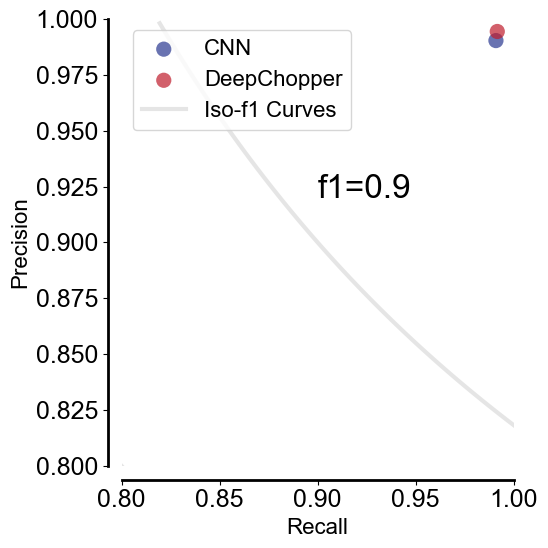

In [92]:
simulation_plot(d3, d1)

# F1C Bar PLot for Chemeric Read compare

In [10]:
type_names = ["Dorado with Trim", "Dorado w/o Trim", "DC"]

vcap002_data = {
    type_names[0]: [107266, 6228],
    type_names[1]: [107304, 6228],
    type_names[2]: [9844, 4664],
}

vcap004_data = {
    type_names[0]: [29144, 7165],
    type_names[1]: [29542, 7119],
    type_names[2]: [23045, 7027], 
}


def prepare_data(data):
    data_with_validated = {
        "value": list(
            chain.from_iterable(
                [[data[t][0] - data[t][1], data[t][1]] for t in type_names]
            )
        ),
        "data type": list(chain.from_iterable([[i] * 2 for i in type_names])),
        "type": ["Unvalidated", "Validated"] * len(type_names),
    }
    data_df = pd.DataFrame(data_with_validated)
    return data_df

In [12]:
data_df = prepare_data(vcap002_data)
vcap004_data_df = prepare_data(vcap004_data)
# wtc11_data_df = prepare_data(wtc11_data)

In [13]:
data_df

,value,data type,type
0,101038,Dorado with Trim,Unvalidated
1,6228,Dorado with Trim,Validated
2,101076,Dorado w/o Trim,Unvalidated
3,6228,Dorado w/o Trim,Validated
4,5180,DC,Unvalidated
5,4664,DC,Validated


Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Data  Type')

Text(0.5, 0, 'Data  Type')

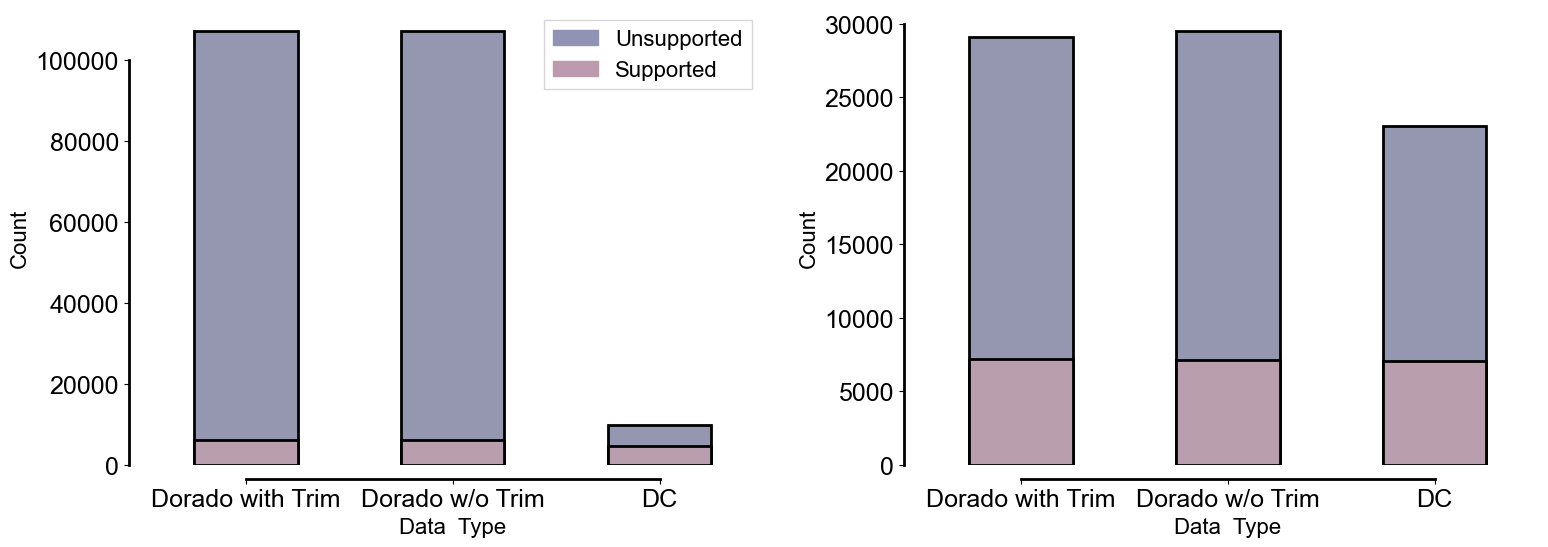

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
axs = axs.flatten()

bar_width = 0.5

bar1 = sns.barplot(
    data=data_df.groupby("data type")["value"].sum().reset_index(),
    x="data type",
    y="value",
    order=type_names,
    color=e2,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[0],
)
bar2 = sns.barplot(
    data=data_df.query("type == 'Validated'"),
    x="data type",
    y="value",
    order=type_names,
    estimator=sum,
    color=e3,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[0],
)


bar3 = sns.barplot(
    data=vcap004_data_df.groupby("data type")["value"].sum().reset_index(),
    x="data type",
    y="value",
    order=type_names,
    color=e2,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[1],
)
bar4 = sns.barplot(
    data=vcap004_data_df.query("type == 'Validated'"),
    x="data type",
    y="value",
    order=type_names,
    estimator=sum,
    color=e3,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[1],
)


# add legend
top_bar = mpatches.Patch(color=e2, label="Unsupported")
bottom_bar = mpatches.Patch(color=e3, label="Supported")
axs[0].legend(handles=[top_bar, bottom_bar], fancybox=False)

sns.despine(offset=10, trim=True)

axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")

axs[0].set_xlabel("Data  Type")
axs[1].set_xlabel("Data  Type")

plt.tight_layout()
plt.savefig("bar_plot_chemeric_read_cmp.pdf", dpi=300)

In [14]:
# wtc11  and other platform  plot

type_names_other_platform = ["Dorado with Trim", "DC"]

vcap_002_event_data = {type_names_other_platform[0]: [107266, 6228], type_names_other_platform[1]: [9844, 4664]}
vcap_004_event_data = {type_names_other_platform[0]: [10708, 2917], type_names_other_platform[1]: [5028, 1858]}



wtc11_data = {
    "ONT PCR cDNA": {type_names_other_platform[0]: [12987, 4765], type_names_other_platform[1]: [5903, 3904]},
    "ONT CapTrap": {type_names_other_platform[0]: [12987, 3972], type_names_other_platform[1]: [5903, 3343]},
    "ONT R2C2": {type_names_other_platform[0]: [12987, 4023], type_names_other_platform[1]: [5903, 3913]},
    "PB cDNA": {type_names_other_platform[0]: [12987, 3970], type_names_other_platform[1]: [5903, 3873]},
    "PB CapTrap": {type_names_other_platform[0]: [12987, 3410], type_names_other_platform[1]: [5903, 3027]}
    }

# support rate
# ONT PCR cDNA:do sp 36.69%
# ONT PCR cDNA:dc sp 66.14%
# ONT CapTrap:do sp 30.58%
# ONT CapTrap:dc sp 56.63%
# ONT R2C2:do sp 30.98%
# ONT R2C2:dc sp 66.29%
# PB cDNA:do sp 30.57%
# PB cDNA:dc sp 65.61%
# PB CapTrap:do sp 26.26%
# PB CapTrap:dc sp 51.28%

def prepare_data_other_platform(data, type_names):
    data_with_validated = {
        "value": list(
            chain.from_iterable(
                [[data[t][0] - data[t][1], data[t][1]] for t in type_names]
            )
        ),
        "data type": list(chain.from_iterable([[i] * 2 for i in type_names])),
        "type": ["Unvalidated", "Validated"] * len(type_names),
    }
    data_df = pd.DataFrame(data_with_validated)
    return data_df


def plot_other_platform(data, type_names, figsize=(20, 10), figname=None):

    fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=False)
    axs  = axs.flatten()
    bar_width = 0.3

    # add legend
    top_bar = mpatches.Patch(color=e2, label="Unsupported")
    bottom_bar = mpatches.Patch(color=e3, label="Supported")
    
    ax_id = 0
    for dtype, values in data.items():
        ax = axs[ax_id]
        dtype_df = prepare_data_other_platform(values, type_names)

        bar1 = sns.barplot(
            data=dtype_df.groupby("data type")["value"].sum().reset_index(),
            x="data type",
            y="value",
            order=type_names,
            color=e2,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
        ax=ax,
        )
        bar2 = sns.barplot(
            data=dtype_df.query("type == 'Validated'"),
            x="data type",
            y="value",
            order=type_names,
            estimator=sum,
            color=e3,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
            ax=ax,
        )
        ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

        ax.set_ylabel("Count")
        ax.set_xlabel("Data  Type")
        ax.set_title(dtype)
     
        ax_id +=1

    # remove last axis 
    axs[-1].axis("off")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    if figname:
        plt.savefig(figname, dpi=300)

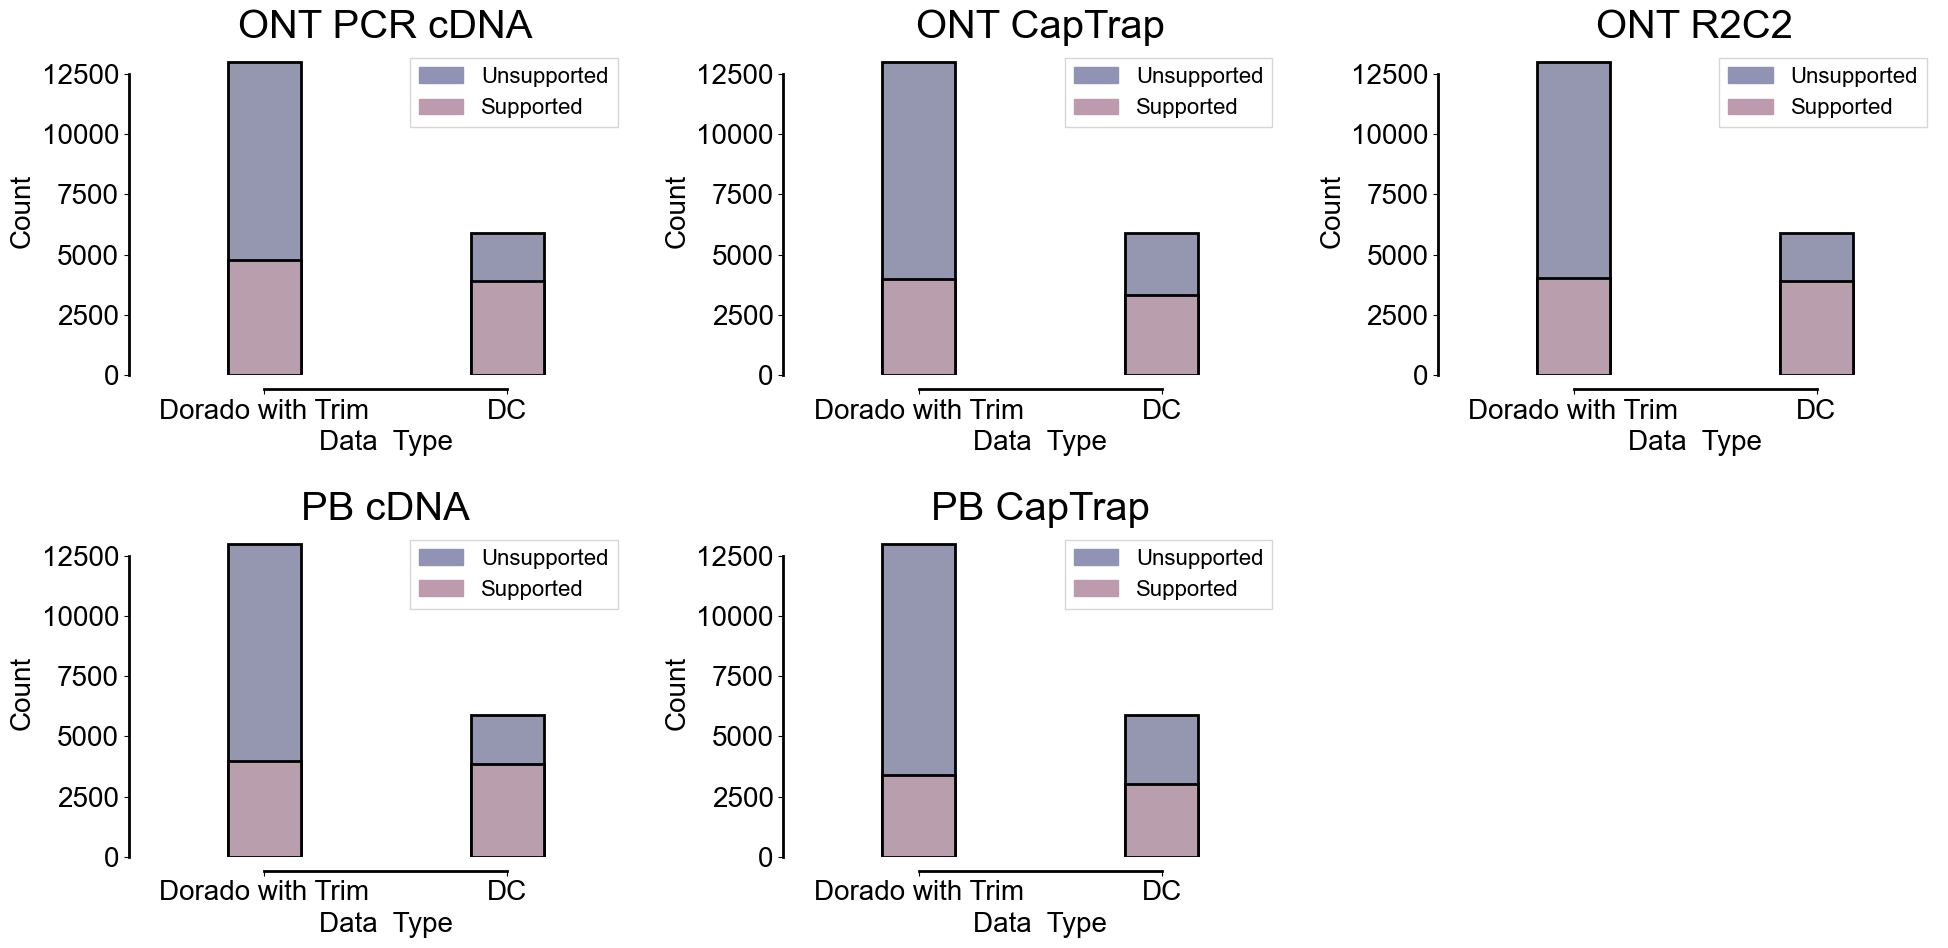

In [27]:
plot_other_platform(wtc11_data, type_names_other_platform, figname="wtc11_bar_plot_chemeric_read_cmp_2.pdf")

In [20]:
# chimerica,A549,HCT116,HepG2,K562,MCF7
# dorado,"12,803","46,800","16,921","23,214","17,646"
# deepchopper,"2,365","9,527","2,726","4,252","6,700"
# Direct cDNA raw,"124,970","877,889","157,016","181,361","226,681"
# Support DC,"1,029","5,330","1,402","1,867","3,171"
# Support dorado,"1,112","7,147","1,540","2,109","3,369"

# In total compare to dc
# A549: 81.53%
# HCT116: 79.64%
# HepG2: 83.89%
# K562: 81.68%
# MCF7: 62.03%

# Supporting rate 
# A549:do sp 8.69%
# A549:dc sp 43.51%
# HCT116:do sp 15.27%
# HCT116:dc sp 55.95%
# HepG2:do sp 9.10%
# HepG2:dc sp 51.43%
# K562:do sp 9.09%
# K562:dc sp 43.91%
# MCF7:do sp 19.09%
# MCF7:dc sp 47.33%


sigpore_data = {
    "A549": {type_names_other_platform[0]: [12803, 1112], 
             type_names_other_platform[1]: [2365, 1029]},
    "HCT116": {type_names_other_platform[0]: [46800, 7147], 
               type_names_other_platform[1]: [9527, 5330]},
    "HepG2": {type_names_other_platform[0]: [16921, 1540], 
              type_names_other_platform[1]: [2726, 1402]},
    "K562": {type_names_other_platform[0]: [23214, 2109], 
             type_names_other_platform[1]: [4252, 1867]},
    "MCF7": {type_names_other_platform[0]: [17646, 3369], 
             type_names_other_platform[1]: [6700, 3171]},
    }


def plot_sigpore_platform(data, type_names, figsize=(20, 10), figname=None):

    fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=False)
    axs  = axs.flatten()
    bar_width = 0.3

    # add legend
    top_bar = mpatches.Patch(color=e2, label="Unsupported")
    bottom_bar = mpatches.Patch(color=e3, label="Supported")
    
    ax_id = 0
    for dtype, values in data.items():
        ax = axs[ax_id]
        dtype_df = prepare_data_other_platform(values, type_names)

        bar1 = sns.barplot(
            data=dtype_df.groupby("data type")["value"].sum().reset_index(),
            x="data type",
            y="value",
            order=type_names,
            color=e2,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
        ax=ax,
        )
        bar2 = sns.barplot(
            data=dtype_df.query("type == 'Validated'"),
            x="data type",
            y="value",
            order=type_names,
            estimator=sum,
            color=e3,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
            ax=ax,
        )
        ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

        ax.set_ylabel("Count")
        ax.set_xlabel("Data  Type")
        ax.set_title(dtype)
     
        ax_id +=1

    # remove last axis 
    axs[-1].axis("off")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    
    if figname:
        plt.savefig(figname, dpi=300)


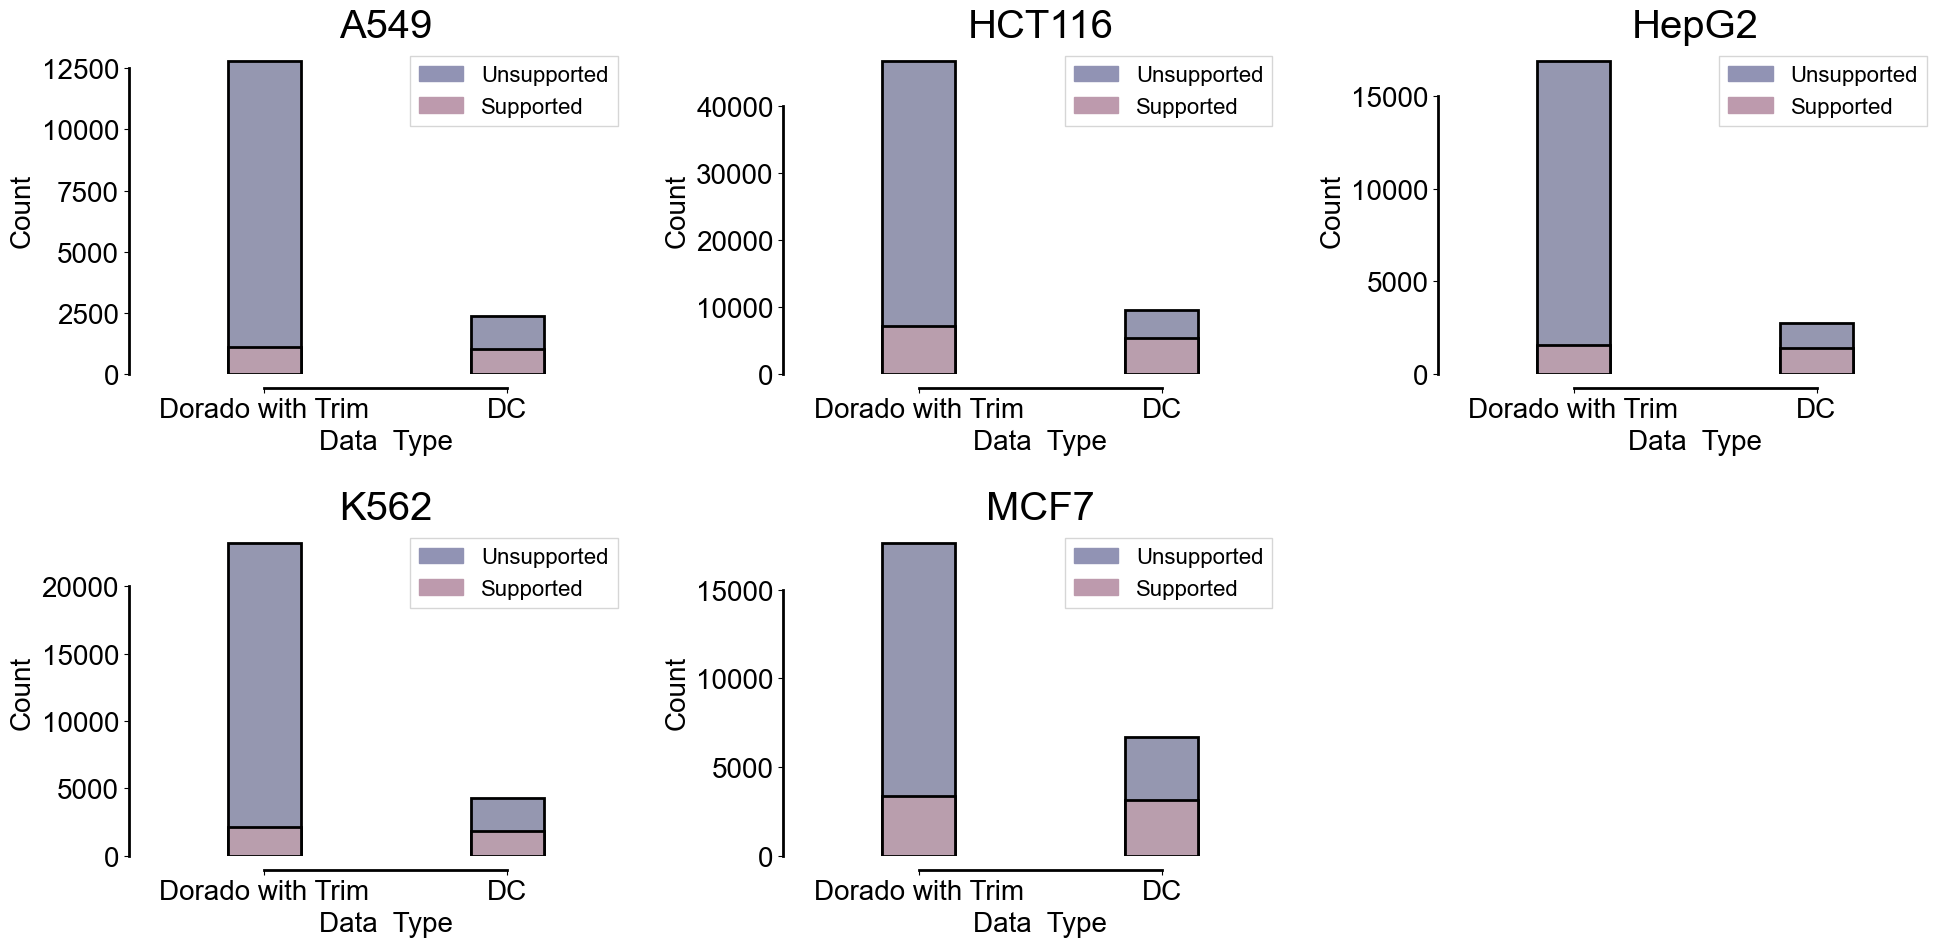

In [23]:
plot_sigpore_platform(sigpore_data, type_names_other_platform, figname="sigpore_bar_plot_chemeric_read_cmp.pdf")

# F1 Bar Plot for Chimeric Read Group Event

In [11]:
def plot_event(data, type_names, figsize=(8, 6), color1=e2, color2=e3, figname="group_chimeric_bar_plot.pdf"):
    fig, ax = plt.subplots(figsize=figsize)

    dtype_df = prepare_data_other_platform(data, type_names)

    bar_width = 0.3
    
    # add legend
    top_bar = mpatches.Patch(color=color1, label="Unsupported")
    bottom_bar = mpatches.Patch(color=color2, label="Supported")

    bar1 = sns.barplot(
        data=dtype_df.groupby("data type")["value"].sum().reset_index(),
        x="data type",
        y="value",
        order=type_names,
        color=color1,
        edgecolor="k",
        linewidth=2,
        width=bar_width,
    ax=ax,
    )
    bar2 = sns.barplot(
        data=dtype_df.query("type == 'Validated'"),
        x="data type",
        y="value",
        order=type_names,
        estimator=sum,
        color=color2,
        edgecolor="k",
        linewidth=2,
        width=bar_width,
        ax=ax,
    )
    ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

    ax.set_ylabel("Count")
    ax.set_xlabel("Data  Type")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.savefig(figname, dpi=300)

In [12]:
type_names_other_platform = ["Dorado with Trim", "DC"]

vcap_002_event_data = {type_names_other_platform[0]: [79015, 5740], type_names_other_platform[1]: [4947, 2509]}

vcap_004_event_data = {type_names_other_platform[0]: [10708, 2917], type_names_other_platform[1]: [5028, 1858]} 

# gene fusion of vcap 002 with cdna support 
vcap_002_gene_fusion =  {type_names_other_platform[0]: [555, 17], type_names_other_platform[1]: [60, 20]}

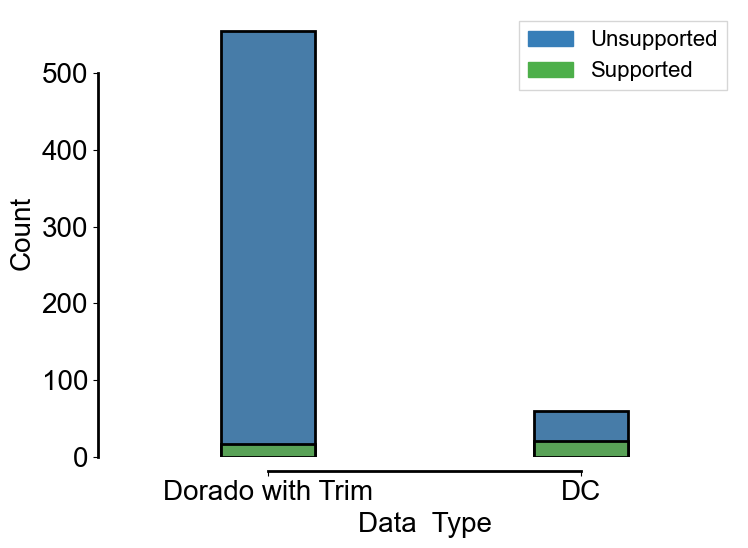

In [15]:
plot_event(vcap_002_gene_fusion, type_names_other_platform, color1=f1, color2=f2, figname="vcap002_gene_fusion_with_cdna_plot.pdf")

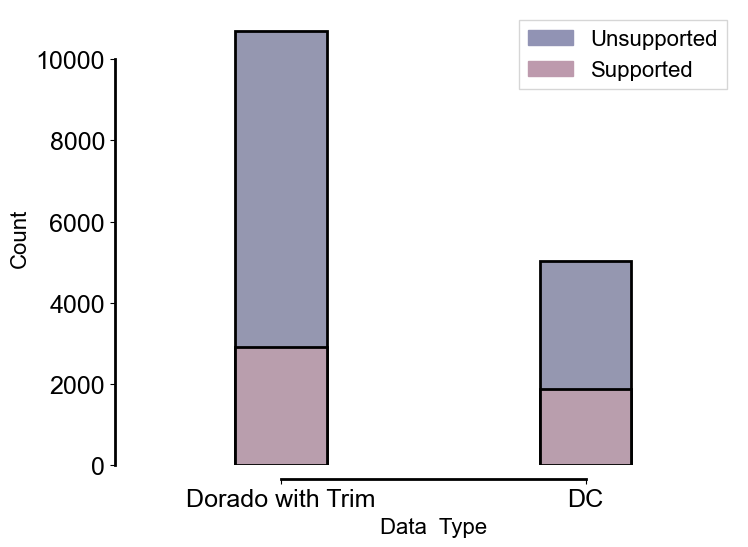

In [24]:
plot_event(vcap_004_event_data, type_names_other_platform, figname="vcap004_group_chimeric_bar_plot.pdf")

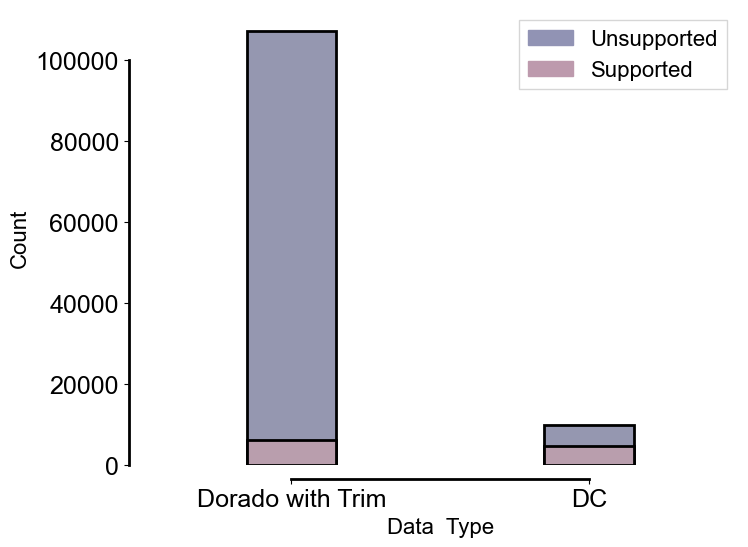

In [16]:
plot_event(vcap_002_event_data, type_names_other_platform, figname="vcap002_group_chimeric_bar_plot.pdf")

# F1D BLAT for internal prediction FP (Dorado chemeric reads - DC chemeric reads)

In [17]:
import json

In [42]:
# load data
plot_data_vcap_002 = json.load(open("data/internal_prediction_seq_blat_top1_indentities.json"))
plot_data_vcap_004 = json.load(
    open("data/fp_vcap_004_hyena_all_predicts_blat_identities.json")
)

In [43]:
len(plot_data_vcap_002)

98807

In [114]:
len(plot_data_vcap_004)

6185

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

Text(0.5, 0, 'BLAT Indentity')

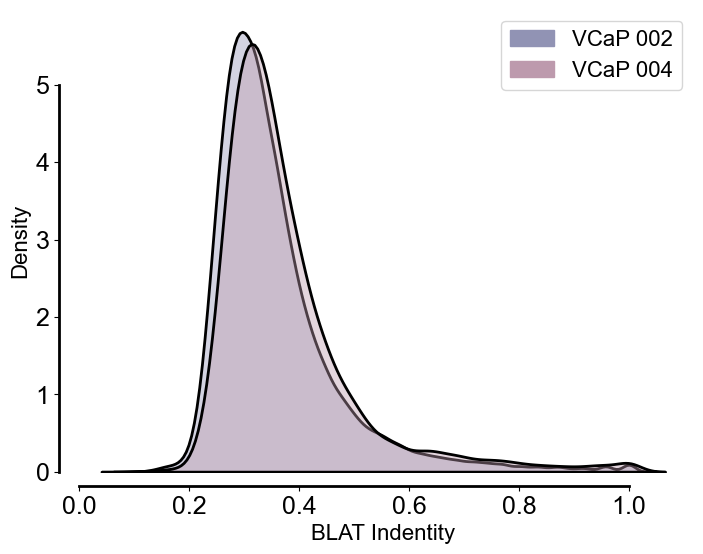

In [62]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=plot_data_vcap_002, fill=True, color=e2, edgecolor="k", linewidth=2, alpha=0.4)
sns.kdeplot(
    data=plot_data_vcap_004, fill=True, color=e3, edgecolor="k", linewidth=2, alpha=0.4
)

left_bar = mpatches.Patch(color=e2, label="VCaP 002")
right_bar = mpatches.Patch(color=e3, label="VCaP 004")
plt.legend(handles=[left_bar, right_bar], loc="upper right")

sns.despine(offset=10, trim=True)
plt.xlabel("BLAT Indentity")
# plt.ylabel("Density")
plt.savefig(
    "blat_for_fp_internal_prediction_cmp_with_dorado.pdf", bbox_inches="tight", dpi=300
)

In [21]:
def box_distribution_plot(data, figsize=(8, 6), figname="box_distri_plot.pdf"):
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=data, ax=ax, palette=[e2, e3])
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.savefig(figname, dpi=300)

<Axes: >

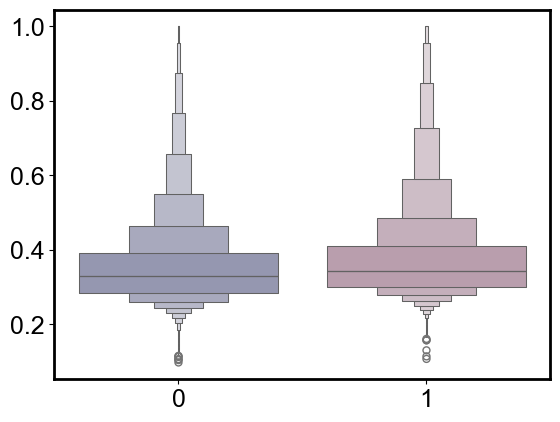

In [22]:
sns.boxenplot(data=[plot_data_vcap_002, plot_data_vcap_004], palette=[e2, e3])

In [104]:
def distributio_plot(data, figsize=(8, 6), color=e2, alpha=1, file_name=""):
    plt.figure(figsize=(7, 6))
    sns.kdeplot(data=data, fill=True, color=color, edgecolor="k", linewidth=2, alpha=1)

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.xlabel("BLAT Indentity")
    plt.savefig(f"identity_distribution_{file_name}.pdf", dpi=300)

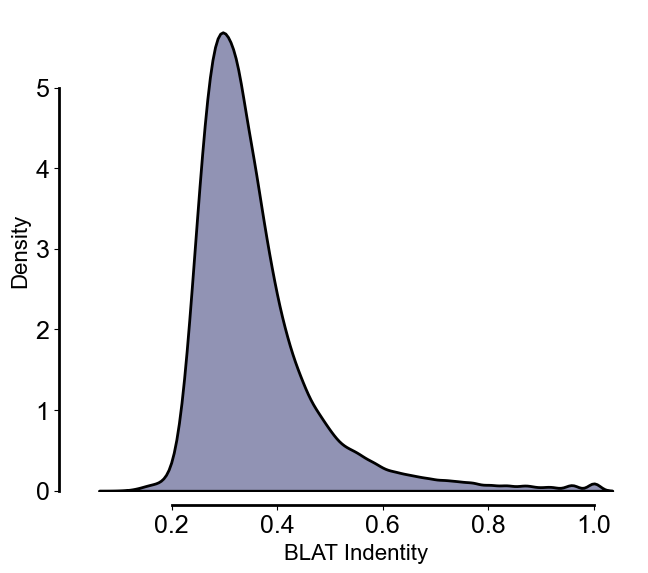

In [105]:
distributio_plot(plot_data_vcap_002, color=e2, file_name="vcap_002")

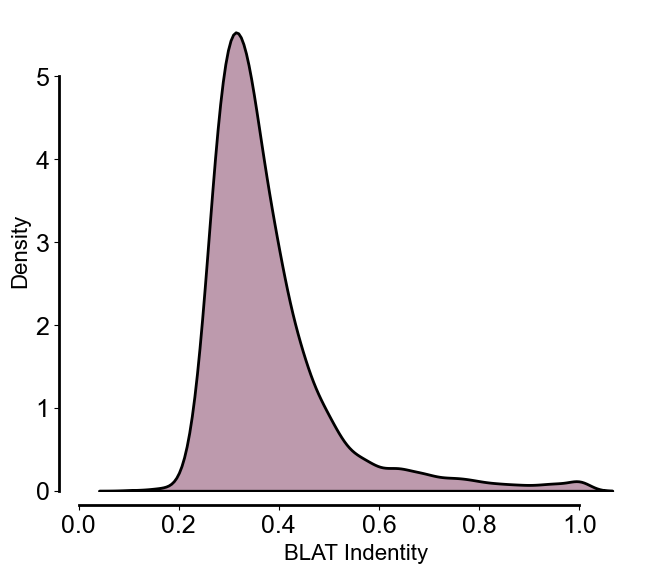

In [106]:
distributio_plot(plot_data_vcap_004, color=e3, file_name="vcap_004")

# F1E Base Quals for internal prediction FP (Dorado chemeric reads - DC chemeric reads)

In [8]:
import json

In [9]:
def plot_qual(file_path):
    from needletail import parse_fastx_file

    quals = []
    for record in parse_fastx_file(file_path):
        current_quals = [ord(i) - 33 for i in list(record.qual)]
        quals.append(sum(current_quals) / len(current_quals))
    return quals

In [10]:
# load data
plot_data_remove_seq_base_quals_vcap002 = [
    i - 33 for i in json.load(open("data/internal_prediction_seq_base_quals.json"))
]
# load data
# plot_qual_left_seq_data = plot_qual("./data/fp_dorado_hyena_vcap_002.fq.gz")

In [26]:
# len(plot_qual_left_seq_data)

In [11]:
len(plot_data_remove_seq_base_quals_vcap002)

146580

In [12]:
plot_data_remove_seq_base_quals_vcap004 = [
    i - 33 for i in json.load(open("data/fp_vcap_004_hyena_predicts_base_quals.json"))
]
# vcap_plot_qual_left_seq_data = plot_qual("./data/fp_dorado_hyena_vcap_004.fq.gz")

In [13]:
len(plot_data_remove_seq_base_quals_vcap004)

11143

In [30]:
# len(vcap_004_plot_data)

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

Text(0.5, 0, 'Base Qual')

Text(0.5, 0, 'Base Qual')

Text(0, 0.5, 'Density')

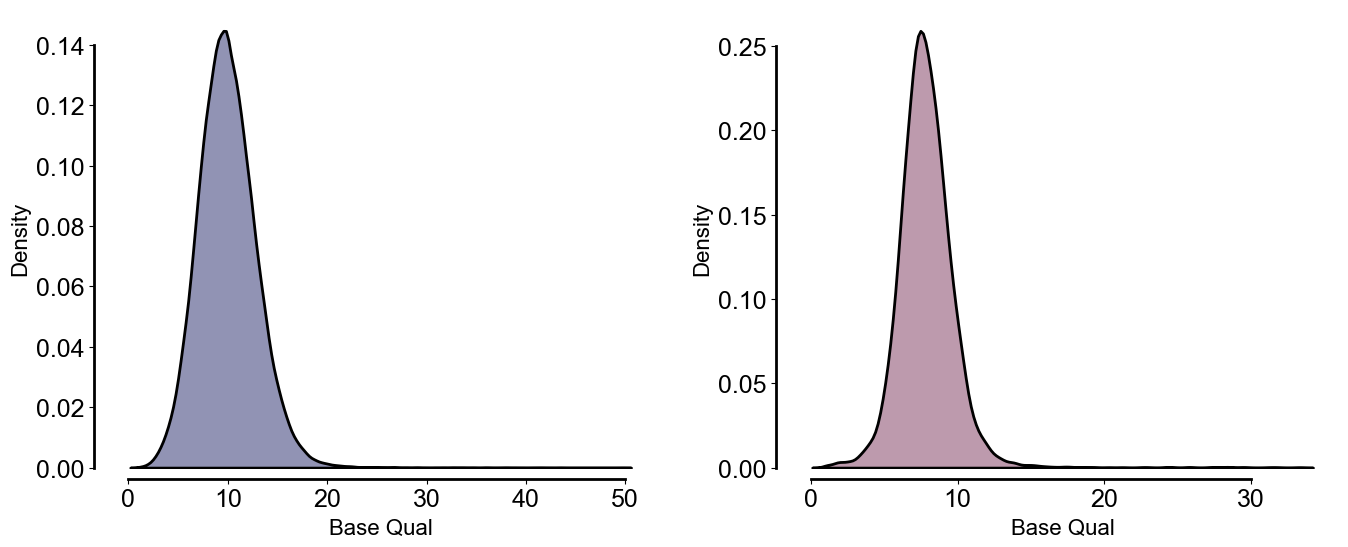

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
axs = axs.flatten()

sns.kdeplot(data=plot_data_remove_seq_base_quals_vcap002, fill=True, color=e2, edgecolor="k", linewidth=2, alpha=1, ax=axs[0])

# sns.kdeplot(
#     data=plot_qual_left_seq_data,
#     fill=True,
#     color=e3,
#     edgecolor="k",
#     linewidth=2,
#     ax=axs[0],
# )

sns.kdeplot(
    data=plot_data_remove_seq_base_quals_vcap004, fill=True, color=e3, edgecolor="k", linewidth=2, alpha=1, ax=axs[1]
)

# sns.kdeplot(
#     data=vcap_plot_qual_left_seq_data,
#     fill=True,
#     color=e3,
#     edgecolor="k",
#     linewidth=2,
#     ax=axs[1],
# )

# left_bar = mpatches.Patch(color=e2, label="Removed Sequence")
# right_bar = mpatches.Patch(color=e3, label="Retained Sequence")
# axs[1].legend(handles=[left_bar, right_bar], loc="best")

sns.despine(offset=8, trim=True)

axs[0].set_xlabel("Base Qual")
axs[1].set_xlabel("Base Qual")
plt.ylabel("Density")


plt.tight_layout()

# fig.subplots_adjust(wspace=0.1)

plt.savefig(
    "base_quals_for_fp_internal_prediction_cmp_with_dorado.pdf",
    bbox_inches="tight",
    dpi=300,
)

### F1 Boxplot of BLAT and Qual for PolyA motif for internal prediction FP (Dorado chemeric reads - DC chemeric reads)

In [14]:
def plot_box_for_base_qual_and_blat(base_qual, blat_identity, figsize=(8, 6), c1=d1, c2=d3, width=0.4, plot_type="violinplot", figname="base_qual_blat_identity_box_plot.pdf"):
    # Creating a DataFrame for the plot
    t1 = "Base Quality"
    t2 = "BLAT Identity"

    df1 = pd.DataFrame({
        'Score': base_qual,
        'Type': t1
    })

    df2 = pd.DataFrame({
        'Score': blat_identity,
        'Type': t2
    })

    # Concatenating the dataframes
    df = pd.concat([df1, df2])

    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    getattr(sns, plot_type)(x='Type', y='Score', data=df[df['Type'] == t1], ax=ax1, color=c1, width=width, fill=True)
    ax1.set_ylabel(t1)

    # Plotting the boxenplot for the identity scores on the right y-axis
    getattr(sns, plot_type)(x='Type', y='Score', data=df[df['Type'] == t2], ax=ax2, color=c2, width=width, fill=True)
    ax2.set_ylabel(t2)

    # ax2.spines['right'].set_color(d3)
    # ax2.yaxis.label.set_color(d3)
    # ax2.tick_params(axis='y', colors=d3)

    # Ensuring the x-axis categories do not overlap
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels([t1, t2])
    
    # add offset 
    sns.despine(offset=10, trim=True, right=False)

    # Adjusting the plot to avoid overlapping of labels
    fig.tight_layout()
    plt.savefig(figname,   bbox_inches="tight", dpi=300)


def plot_box_for_base_qual_with_background(base_qual_data, figname=None, figsize=(4, 5), c1=d1, width=0.4, alpha = 0.15):
    t1 = "Base Quality"
    df1 = pd.DataFrame({
        'Score': base_qual_data,
        'Type': t1
    })
    fig, ax1 = plt.subplots(figsize=figsize)
    sns.boxenplot(x='Type', y='Score', data=df1, ax=ax1, color=c1, width=width, fill=True)

    # draw backround color 
    # 0 - 20 draw red color
    # 20 - 28 draw yellow color 
    # 28 - 50 draw green color 
    ax1.axhspan(0, 20, color='red', alpha=alpha, lw=0)
    ax1.axhspan(20, 40, color='yellow', alpha=alpha, lw=0)
    ax1.axhspan(40, ax1.get_yticks()[-1], color='green', alpha=alpha, lw=0)

    ax1.set_ylabel(t1)
    # add offset 
    sns.despine(offset=10, trim=False)

    # Adjusting the plot to avoid overlapping of labels
    fig.tight_layout()
    if figname:
        plt.savefig(figname,   bbox_inches="tight", dpi=300)

def plot_box_for_blat_identity_without_background(blat_identity_data, figname=None, figsize=(4,5), c2=d2, width=0.4):
    t2 = "BLAT Identity"
    df2 = pd.DataFrame({
        'Score': blat_identity_data,
        'Type': t2
    })
    fig, ax1 = plt.subplots(figsize=figsize)
    sns.boxenplot(x='Type', y='Score', data=df2, ax=ax1, color=c2, width=width, fill=True)

    ax1.set_ylabel(t2)

    sns.despine(offset=10, trim=False)
    fig.tight_layout()
    if figname:
        plt.savefig(figname,   bbox_inches="tight", dpi=300)

def plot_distribution_for_base_qual_with_background(base_qual_data, figname=None, figsize=(4, 5), c1=d1, width=0.4, alpha = 0.15):
    t1 = "Base Quality"
    df1 = pd.DataFrame({
        'Score': base_qual_data,
        'Type': t1
    })
    fig, ax1 = plt.subplots(figsize=figsize)

    sns.kdeplot(data=base_qual_data, fill=True, color=c1, edgecolor="k", linewidth=2, alpha=1, ax=ax1)

    # draw backround color
    # 0 - 20 draw red color
    ax1.axvspan(0, 20, color='red', alpha=alpha, lw=0)
    ax1.axvspan(20, 40, color='yellow', alpha=alpha, lw=0)
    ax1.axvspan(40, ax1.get_xticks()[-1], color='green', alpha=alpha, lw=0)

    ax1.set_xticks(range(0, 55, 10))
    ax1.set_ylabel(t1)
    # add offset 
    sns.despine(offset=10, trim=False)

    # Adjusting the plot to avoid overlapping of labels
    fig.tight_layout()
    if figname:
        plt.savefig(figname,   bbox_inches="tight", dpi=300)

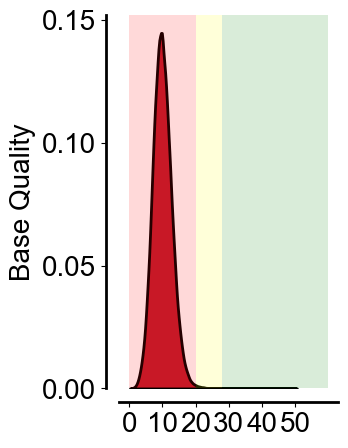

In [23]:
plot_distribution_for_base_qual_with_background(plot_data_remove_seq_base_quals_vcap002, figname="vcap002_base_qual_distribution_plot_with_background.pdf")

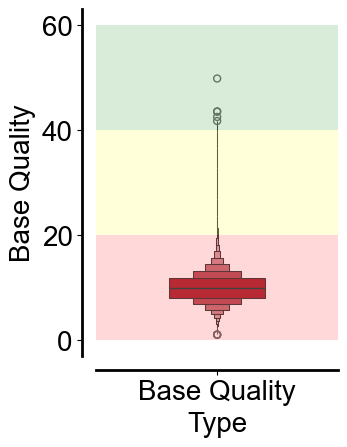

In [15]:
plot_box_for_base_qual_with_background(plot_data_remove_seq_base_quals_vcap002, c1=d1, figname="vcap002_base_qual_box_plot_with_background_2.pdf")

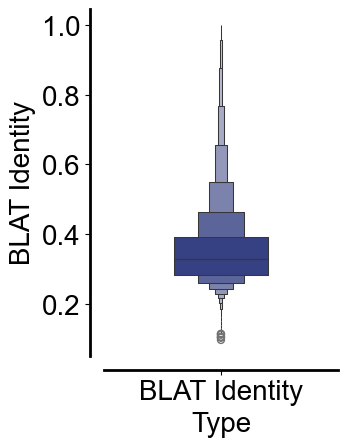

In [100]:
plot_box_for_blat_identity_without_background(plot_data_vcap_002, c2=d3, figname="vcap002_blat_identity_box_plot_without_background.pdf")

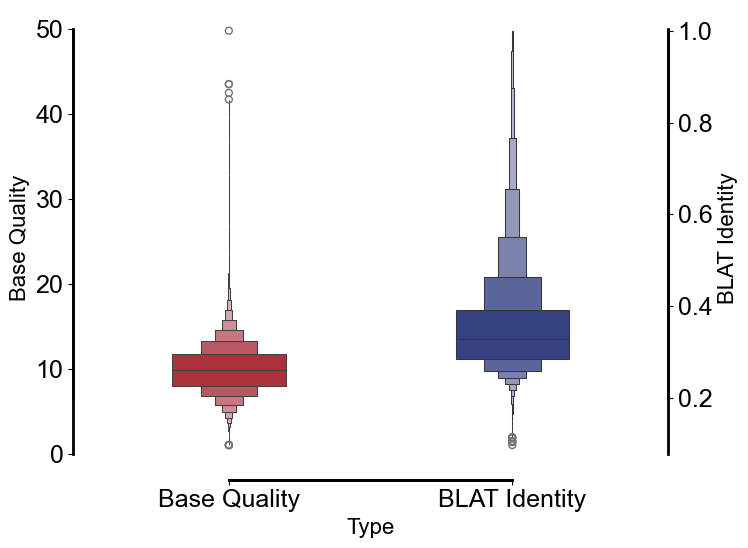

In [101]:
plot_box_for_base_qual_and_blat(plot_data_remove_seq_base_quals_vcap002, plot_data_vcap_002, plot_type="boxenplot",figname="vcap002_base_qual_and_blat_box_plot.pdf")

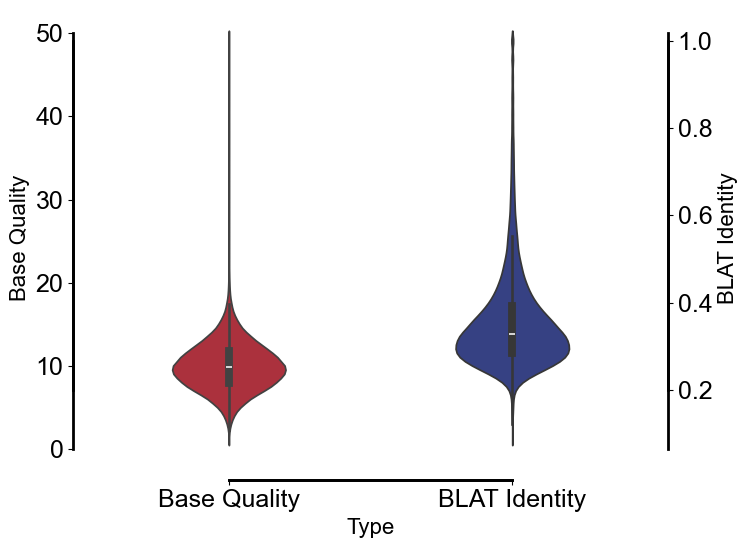

In [102]:
plot_box_for_base_qual_and_blat(plot_data_remove_seq_base_quals_vcap002, plot_data_vcap_002, plot_type="violinplot",figname="vcap002_base_qual_and_blat_violinplot_plot.pdf")

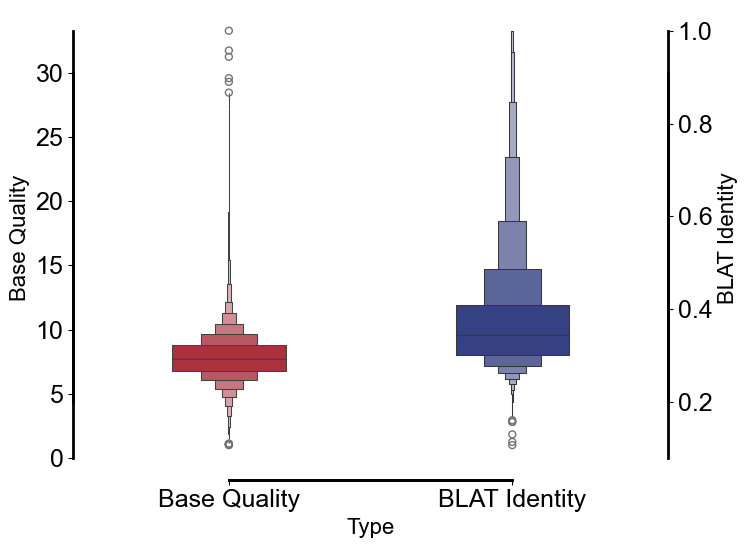

In [115]:
plot_box_for_base_qual_and_blat(plot_data_remove_seq_base_quals_vcap004, plot_data_vcap_004, plot_type="boxenplot",figname="vcap004_base_qual_and_blat_box_plot.pdf")

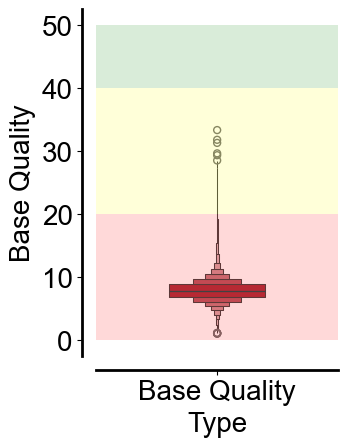

In [16]:
plot_box_for_base_qual_with_background(plot_data_remove_seq_base_quals_vcap004, c1=d1, figname="vcap004_base_qual_box_plot_with_background_2.pdf")

# F1 Histogram for Count of left seq

In [10]:
import json

In [11]:
left_seq_counts = json.load(open("data/vcap_002_left_seq_counts.json"))

In [12]:
left_seq_counts_larger_than_1 = [v for k,v in left_seq_counts.items() if v > 1]

In [13]:
len(left_seq_counts_larger_than_1)

171204

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

def plot_histogram_with_cut(data, color, xlabel, ylabel, file_name=None):
    # Count occurrences of each value
    value_counts = Counter(data)
    
    # Sort the counts
    sorted_counts = sorted(value_counts.items(), key=lambda x: x[0])
    values, counts = zip(*sorted_counts)

    # Identify the highest count
    max_count = max(counts)
    
    # Create the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True, 
                                   gridspec_kw={'height_ratios': [1, 4], 'hspace': 0.05})

    # Plot the highest count in the top subplot
    ax1.bar([values[counts.index(max_count)]], [max_count], color=color, edgecolor="k", linewidth=2)
    ax1.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1] * 1.1)  # Add some space at the top

    # Plot the rest of the data in the bottom subplot
    other_counts = [c if c != max_count else 0 for c in counts]
    ax2.bar(values, other_counts, color=color, edgecolor="k", linewidth=2)

    # Set labels
    ax2.set_xlabel(xlabel)
    fig.text(0.04, 0.5, ylabel, va='center', rotation='vertical')

    # Remove top subplot's x-axis
    ax1.xaxis.set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    # Add broken axis effect
    d = .015  # size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    # ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)
    
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Remove unnecessary spines
    sns.despine(ax=ax1, bottom=True)
    sns.despine(ax=ax2)

    # Set x-ticks to integers
    ax2.set_xticks(values)
    ax2.set_xticklabels(values) 

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

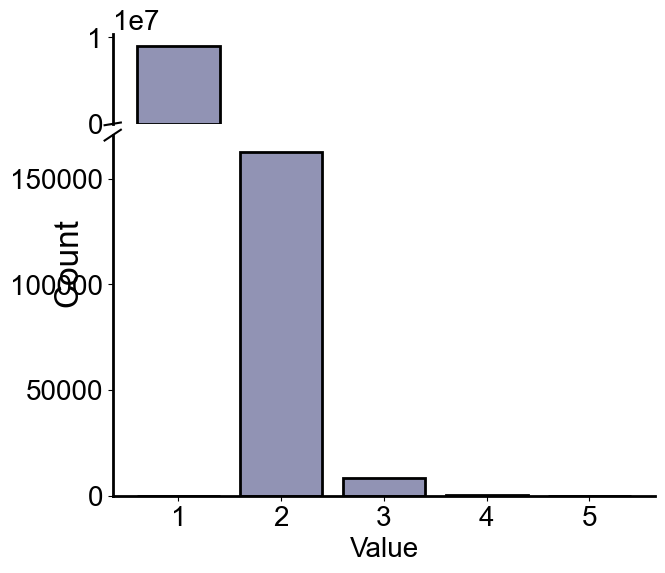

In [29]:
plot_histogram_with_cut(list(left_seq_counts.values()), e2, "Value", "Count", file_name="count_of_vcap_002_left_seq_per_read_all_with_cut.pdf")

<Figure size 700x600 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'The Number of Left Intervals Per Read')

Text(0, 0.5, 'Count (Log Scale)')

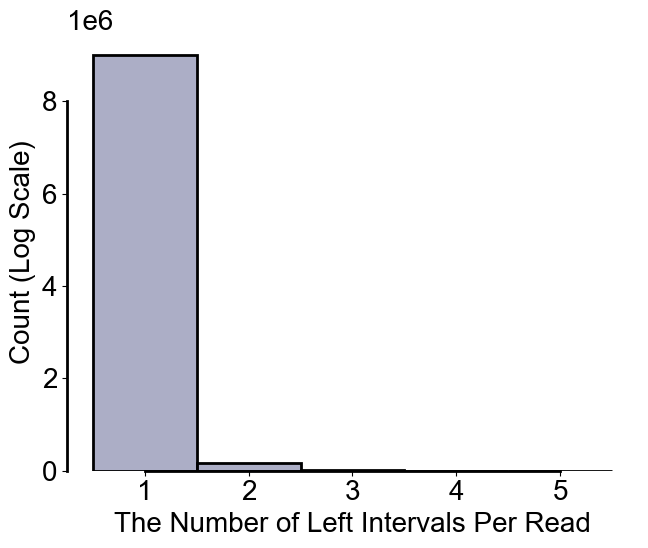

In [175]:
plt.figure(figsize=(7, 6))

sns.histplot(list(left_seq_counts.values()), kde=False, color=e2, edgecolor="k", linewidth=2, discrete=True)
# plt.yscale('log')

plt.xlabel("The Number of Left Intervals Per Read")
plt.ylabel("Count (Log Scale)")

sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig("count_of_vcap_002_left_seq_per_read_all.pdf", dpi=300)

<Figure size 500x400 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'The Number of Intervals Per Predict')

Text(0, 0.5, 'Count (Log Scale)')

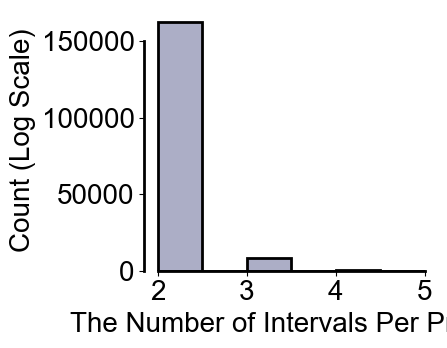

In [33]:
plt.figure(figsize=(5,4))

sns.histplot(left_seq_counts_larger_than_1, kde=False, color=e2, edgecolor="k", linewidth=2, binwidth=0.5)
# plt.hist(left_seq_counts_larger_than_1,  color=e2, edgecolor="k", linewidth=2, align="mid")

# plt.yscale('log')
# plt.xticks(range(0, max_x, 1))

plt.xlabel("The Number of Chopped Intervals Per Read")
plt.ylabel("Count (Log Scale)")

sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig("count_of_vcap_002_left_seq_per_read.pdf", dpi=300)

# F2A Gene Size Distribution for FP

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_f2a(data1, data2, figure_name):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot histogram
    sns.histplot(data1, kde=False, color=e1, label="All genes", ax=ax, binwidth=500)
    sns.histplot(data2, kde=False, color=e3, label="Target genes", ax=ax, binwidth=500)

    # Set labels and title
    ax.set_xlabel("Gene effective size")
    ax.set_ylabel("Frequency")
    ax.set_title("")

    ax.set_xlim(0, 20000)
    ax.set_ylim(0, 20000)
    #ax.set_xscale('log')

    # Add legend
    ax.legend()

    sns.despine(offset=0, trim=True)

    fig.tight_layout()

    fig.savefig(
        f"{figure_name}",
        dpi=300,
        facecolor="w",
        edgecolor="w",
        bbox_inches="tight",
    )
    # plt.close()

def data_preparation_f2a(all_file, target_file, col_name):
    all_genes = pd.read_csv(all_file, sep="\t", index_col=0)
    target_genes = pd.read_csv(target_file, sep="\t", index_col=0)
    all_data = list(all_genes[col_name])
    target_data = list(target_genes[col_name])
    return all_data, target_data


def f2a_plot(all_file, target_file, col_name, figure_name):
    all_data, target_data = data_preparation_f2a(all_file, target_file, col_name)
    distribution_plot_f2a(all_data, target_data, figure_name)

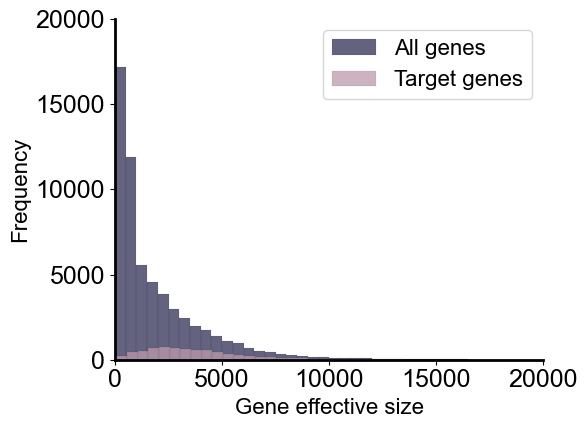

In [140]:
f2a_plot("data/gene_size.txt", "data/FP_exp.gene_size.txt", "maximum_effective_size", "gene_effective_size.pdf")

# F2B Gene Expression for FP

In [145]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import ranksums,wilcoxon,ttest_ind,mannwhitneyu,pearsonr,spearmanr,f_oneway,kruskal


def box_plot(data, figure_name):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot histogram
    sns.boxplot(x='group', y='exp', width=0.3, data=data, ax=ax, fill=False, whis=100000, showcaps=False)

    # Set labels and title
    # ax.set_xlabel("Gene effective size")
    ax.set_xlabel("")
    ax.set_ylabel("Gene expression level")
    ax.set_title("")

    #ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    ax.minorticks_off()
    # ax.set_xlim(0, 20000)
    ax.set_yscale('log')

    # Add legend
    # ax.legend()

    sns.despine(trim=True, left=False)
    fig.tight_layout(w_pad=1.1)
    fig.savefig(
        f"{figure_name}",
        dpi=300,
        facecolor="w",
        edgecolor="w",
        bbox_inches="tight",
    )


def data_preparation_f2b(all_file, target_file, col_name):
    all_genes = pd.read_csv(all_file, sep="\t", index_col=0)
    target_genes = pd.read_csv(target_file, sep="\t", index_col=0)
    all_data = list(all_genes[col_name])
    target_data = list(target_genes[col_name])

    data = pd.DataFrame(
        {
            "exp": np.concatenate([all_data, target_data]),
            "group": ["all_genes"] * len(all_data)
            + ["target_genes"] * len(target_data),
        }
    )
    all_exp = data[data["group"] == "all_genes"]["exp"]
    target_exp = data[data["group"] == "target_genes"]["exp"]

    print(mannwhitneyu(target_exp, all_exp, alternative="greater"))

    return data


def f2b_boxplot(all_file, target_file, col_name, figure_name):
    data = data_preparation_f2b(all_file, target_file, col_name)
    box_plot(data, figure_name)


MannwhitneyuResult(statistic=104581185.5, pvalue=0.0)


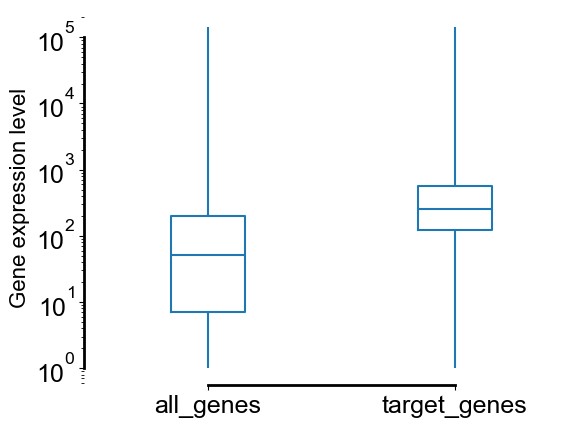

In [146]:
f2b_boxplot("data/dorado.gene_exp.txt", "data/FP_exp.gene_exp.txt", "exp_count", "gene_exp.pdf")

# FS2A distribution of false positives across chr

## Vcap 002  

In [ ]:
# [2024-07-17T15:42:11Z INFO  internal] Total number of reads: 175094
# [2024-07-17T15:42:11Z INFO  internal] Number of reads with SA tag: 869
# [2024-07-17T15:42:11Z INFO  internal] Number of reads without SA tag: 174225
# [2024-07-17T15:42:11Z INFO  internal] Summary saved to sa_summary.json
# [2024-07-17T15:42:11Z INFO  internal] elapsed time: 666.45ms

In [33]:
import pysam
import json

In [19]:
samfile  = pysam.AlignmentFile("data/fp_dorado_hyena_vcap_002.bam", "rb")

# len([1 for read in samfile.fetch() if read.is_mapped and not read.is_secondary and not read.is_supplementary])

# len([1 for read in samfile.fetch() if not read.is_mapped])

# for read in samfile.fetch():
#     if read.is_unmapped:
#         print(read)

In [28]:
# read_ids = [read.query_name for read in samfile.fetch()]
for read in samfile.fetch():
    if read.query_name == "a08a11cf-887d-4279-8724-26fafa1abcf5":
        print(read.reference_name, read.mapping_quality, read.is_mapped)
        if read.has_tag("SA") and not read.is_secondary and not read.is_supplementary:
            print(read.get_tag("SA"))
        # print(read)

chr10 38 True
chr11 60 True
chr6 0 True
chr6 0 True
chr8 60 True
chr11,46428626,-,82S506M21D941S,60,97;chr10,124490384,-,390S297M13240D842S,38,83;


In [34]:
vcap002_sa_tag_summary_path = "data/fp_dorado_hyena_vcap_002_do_sa_summary.json"
vcap002_sa_tag_summary = json.load(open(vcap002_sa_tag_summary_path))

In [35]:
len(vcap002_sa_tag_summary)

88164

In [36]:
vcap002_sa_tag_summary

{'9b31769e-5294-409f-9347-272ecf7917dd': ['chr5:181236937', 'chr19:36115547'],
 '3fc53dcd-3055-41e1-ad40-391215cadfb7': ['chr19:13153095', 'chr8:108201743'],
 '5e9eb0e4-e42a-4279-9878-e542227079ea': ['chr8:133237175',
  'chr19_GL949748v2_alt:176140'],
 'eea9a573-ee58-4443-adbd-76a502716f0a': ['chr11:66638705', 'chr19:48615331'],
 'd3e5f061-df93-4223-802a-8d6b676018f7': ['chr6_GL000254v2_alt:4708052',
  'chr5:132866652'],
 '7ddb33ec-0f2f-4cad-9511-8e045c06ffa8': ['chr19:48795066', 'chr17:82078343'],
 'f23dadfd-5af7-40bc-88b0-dfe022dccf4f': ['chr12:14881893', 'chr2:101002702'],
 'ee653c6b-c110-4fbd-b13f-328338629e83': ['chr12:6965352', 'chr19:50878632'],
 'f937a2a4-ec6f-49c2-824e-5395870329eb': ['chr3:64010566', 'chr19:12943610'],
 'acd69c38-fca8-4800-9a1d-8020ce96ef30': ['chr8:42541631', 'chr1:6186220'],
 '71d3a3b1-574b-4c8d-ba01-5e3fdef1368d': ['chrM:3316', 'chr2:216499269'],
 'b1057a6f-574a-459f-97bb-62480f92d721': ['chr9:5357960', 'chr11:63759674'],
 'fc0dc82f-983b-4980-b158-3cd7e902

In [37]:
all_chrs = [f"chr{i}" for i in range(1, 23)]  + [ "chrX", "chrY", "chrM", 'alt']
all_chrs_index = {v: i  for i,v in enumerate(all_chrs)}

In [38]:
from collections import defaultdict

def filter_data(data):
    filtered_data = defaultdict(list)
    for k, vs in data.items():
        name = k
        filtered_data[name].append((k, vs[0]))
        
    return filtered_data

In [39]:
# filter_vcap002_sa_tag_summary = filter_data(vcap002_sa_tag_summary)

In [40]:
def sort_value(value):
    return int(value[0].split("|")[1].split(":")[0])

In [41]:
def extract_chr(sa_summary_connection, all_chrs):
    result = defaultdict(list)

    for k, vs in sa_summary_connection.items():
        cleaned_vs = []
        for v in vs:
            chr_name = v.split(":")[0]
            if chr_name not in all_chrs:
                chr_name = "alt"
            cleaned_vs.append(chr_name)

        result[k] = cleaned_vs

    return result

In [42]:
vcap002_sa_tag_summary_connection_chr = extract_chr(vcap002_sa_tag_summary, all_chrs)

In [43]:
vcap002_sa_tag_summary_connection_chr

defaultdict(list,
            {'9b31769e-5294-409f-9347-272ecf7917dd': ['chr5', 'chr19'],
             '3fc53dcd-3055-41e1-ad40-391215cadfb7': ['chr19', 'chr8'],
             '5e9eb0e4-e42a-4279-9878-e542227079ea': ['chr8', 'alt'],
             'eea9a573-ee58-4443-adbd-76a502716f0a': ['chr11', 'chr19'],
             'd3e5f061-df93-4223-802a-8d6b676018f7': ['alt', 'chr5'],
             '7ddb33ec-0f2f-4cad-9511-8e045c06ffa8': ['chr19', 'chr17'],
             'f23dadfd-5af7-40bc-88b0-dfe022dccf4f': ['chr12', 'chr2'],
             'ee653c6b-c110-4fbd-b13f-328338629e83': ['chr12', 'chr19'],
             'f937a2a4-ec6f-49c2-824e-5395870329eb': ['chr3', 'chr19'],
             'acd69c38-fca8-4800-9a1d-8020ce96ef30': ['chr8', 'chr1'],
             '71d3a3b1-574b-4c8d-ba01-5e3fdef1368d': ['chrM', 'chr2'],
             'b1057a6f-574a-459f-97bb-62480f92d721': ['chr9', 'chr11'],
             'fc0dc82f-983b-4980-b158-3cd7e902a5ce': ['chr17', 'chr21'],
             'e6f7d025-de6e-4ede-a064-eaa4b77236

In [44]:
len(vcap002_sa_tag_summary_connection_chr)

88164

In [45]:
len([i for i in vcap002_sa_tag_summary_connection_chr.values() if "alt" in i])

5765

In [46]:
for k, v in vcap002_sa_tag_summary_connection_chr.items():
    if len(v) > 2:
        print(k, v)

In [47]:
vcap002_sa_tag_summary_connection_chr

defaultdict(list,
            {'9b31769e-5294-409f-9347-272ecf7917dd': ['chr5', 'chr19'],
             '3fc53dcd-3055-41e1-ad40-391215cadfb7': ['chr19', 'chr8'],
             '5e9eb0e4-e42a-4279-9878-e542227079ea': ['chr8', 'alt'],
             'eea9a573-ee58-4443-adbd-76a502716f0a': ['chr11', 'chr19'],
             'd3e5f061-df93-4223-802a-8d6b676018f7': ['alt', 'chr5'],
             '7ddb33ec-0f2f-4cad-9511-8e045c06ffa8': ['chr19', 'chr17'],
             'f23dadfd-5af7-40bc-88b0-dfe022dccf4f': ['chr12', 'chr2'],
             'ee653c6b-c110-4fbd-b13f-328338629e83': ['chr12', 'chr19'],
             'f937a2a4-ec6f-49c2-824e-5395870329eb': ['chr3', 'chr19'],
             'acd69c38-fca8-4800-9a1d-8020ce96ef30': ['chr8', 'chr1'],
             '71d3a3b1-574b-4c8d-ba01-5e3fdef1368d': ['chrM', 'chr2'],
             'b1057a6f-574a-459f-97bb-62480f92d721': ['chr9', 'chr11'],
             'fc0dc82f-983b-4980-b158-3cd7e902a5ce': ['chr17', 'chr21'],
             'e6f7d025-de6e-4ede-a064-eaa4b77236

In [48]:
all_chrs_index

{'chr1': 0,
 'chr2': 1,
 'chr3': 2,
 'chr4': 3,
 'chr5': 4,
 'chr6': 5,
 'chr7': 6,
 'chr8': 7,
 'chr9': 8,
 'chr10': 9,
 'chr11': 10,
 'chr12': 11,
 'chr13': 12,
 'chr14': 13,
 'chr15': 14,
 'chr16': 15,
 'chr17': 16,
 'chr18': 17,
 'chr19': 18,
 'chr20': 19,
 'chr21': 20,
 'chr22': 21,
 'chrX': 22,
 'chrY': 23,
 'chrM': 24,
 'alt': 25}

In [49]:
def process_dorado_trim_sa_reads(sa_tag_summary, chrs, all_chr_index):
    matrix_plot = pd.DataFrame(np.zeros((len(chrs), len(chrs))),  columns=chrs,  index=chrs)
    
    for k, v in sa_tag_summary.items():        
        assert len(v) == 2 
        
        c1 = v[0]
        c2 = v[1]
        
            
        if "_" in c1:
            c1 = "alt"
            
        if "_" in c2:
            c2 = "alt"

        c1_index = all_chr_index[c1]
        c2_index = all_chr_index[c2] 

        if c1_index > c2_index:
            c1_index,c2_index = c2_index,c1_index
        
        matrix_plot.iloc[c1_index, c2_index] +=1 

    return matrix_plot

In [50]:
import pandas as pd
import numpy as np

matrix_data  = process_dorado_trim_sa_reads(vcap002_sa_tag_summary_connection_chr, all_chrs, all_chrs_index)

In [51]:
matrix_data

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr17,chr18,chr19,chr20,chr21,chr22,chrX,chrY,chrM,alt
chr1,458.0,617.0,666.0,349.0,470.0,664.0,379.0,465.0,607.0,405.0,...,781.0,130.0,1245.0,235.0,122.0,241.0,335.0,28.0,434.0,436.0
chr2,0.0,212.0,505.0,252.0,325.0,517.0,264.0,293.0,364.0,258.0,...,562.0,81.0,872.0,182.0,86.0,176.0,197.0,20.0,303.0,289.0
chr3,0.0,0.0,287.0,300.0,394.0,521.0,304.0,330.0,432.0,303.0,...,590.0,99.0,967.0,198.0,113.0,212.0,267.0,19.0,310.0,354.0
chr4,0.0,0.0,0.0,60.0,172.0,258.0,158.0,162.0,227.0,128.0,...,316.0,40.0,472.0,110.0,44.0,82.0,107.0,12.0,172.0,170.0
chr5,0.0,0.0,0.0,0.0,141.0,364.0,220.0,251.0,320.0,179.0,...,452.0,52.0,659.0,133.0,69.0,128.0,179.0,10.0,232.0,196.0
chr6,0.0,0.0,0.0,0.0,0.0,205.0,348.0,337.0,410.0,258.0,...,634.0,77.0,819.0,160.0,124.0,173.0,236.0,24.0,302.0,314.0
chr7,0.0,0.0,0.0,0.0,0.0,0.0,97.0,201.0,268.0,157.0,...,355.0,47.0,513.0,106.0,63.0,96.0,145.0,16.0,202.0,186.0
chr8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,273.0,190.0,...,450.0,69.0,641.0,146.0,67.0,115.0,162.0,14.0,222.0,195.0
chr9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,241.0,...,477.0,63.0,703.0,158.0,76.0,169.0,221.0,17.0,258.0,248.0
chr10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,...,301.0,55.0,512.0,119.0,60.0,105.0,132.0,8.0,182.0,172.0


In [52]:
def heatmap(matrix_data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Assuming you have your data in matrix_data
    data = matrix_data.iloc[:25, :25]
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Create the mask for the upper triangle
    mask = np.tril(np.ones_like(data, dtype=bool), k=1)
    
    # Create the heatmap
    sns.heatmap(data, 
                mask=mask, 
                cmap=sns.diverging_palette(150, 10, as_cmap=True),
                square=True,  # Make sure the cells are square
                linewidths=0.5,  # Add lines between cells
                cbar_kws={"shrink": .8},  # Adjust colorbar size
                xticklabels=False,  # Hide x-axis labels
                yticklabels=False)  # Hide y-axis labels
    
    # Remove all ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add labels on the diagonal
    for i, label in enumerate(data.index):
        ax.text(i+0.5, i+0.5, label, ha='center', va='center', rotation=45)
    
    # Adjust the layout to prevent clipping of labels
    plt.tight_layout()
    
    # Show the plot
    # plt.show()

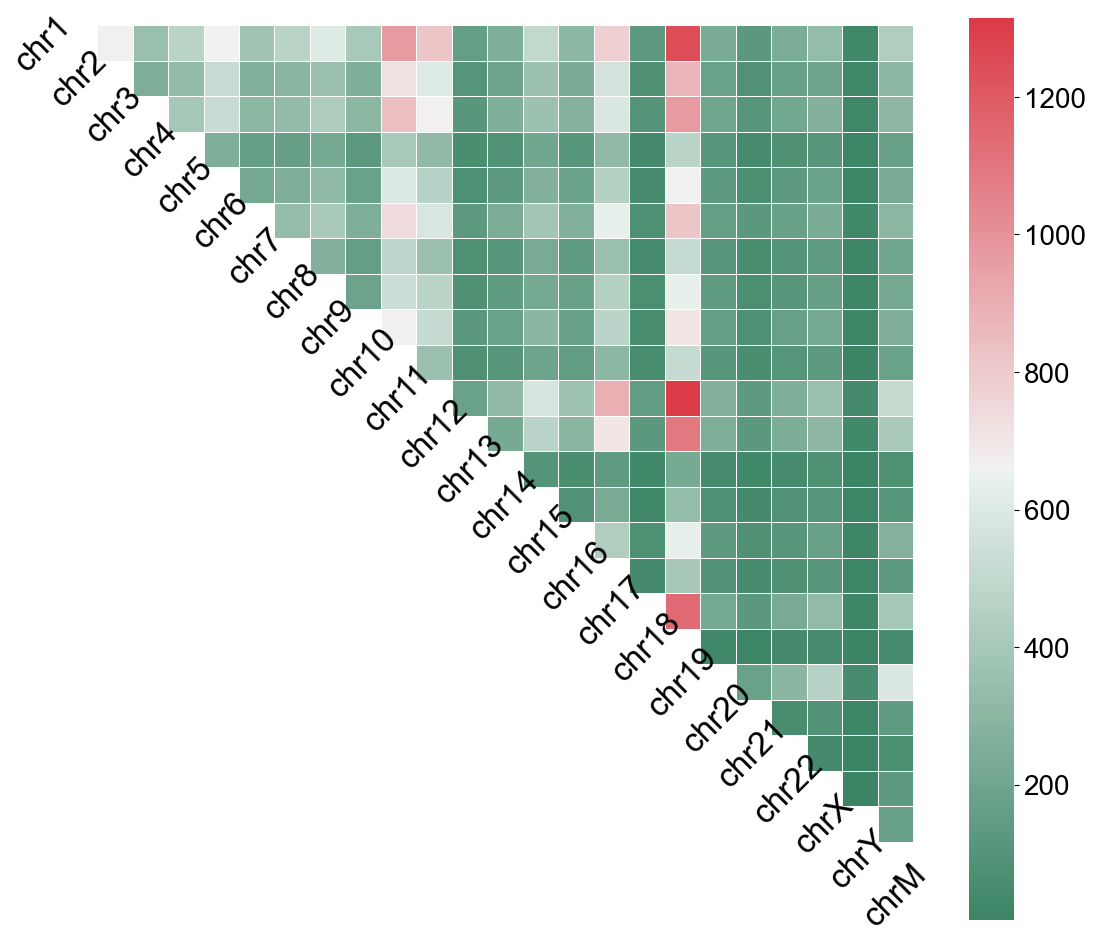

In [53]:
heatmap(matrix_data)

In [73]:
def heatmap2(matrix_data, file_name=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Assuming you have your data in matrix_data
    data = matrix_data.iloc[:25, :25]
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Create the mask for the upper triangle
    mask = np.zeros_like(data)
    mask[np.tril_indices_from(mask, k=-1)] = True

    # Create a more contrasting and diverse color palette
    cmap = sns.diverging_palette(240, 10, as_cmap=True, center="light", s=99, l=50, n=9)
    
    # Create the heatmap
    sns.heatmap(data, 
                mask=mask, 
                cmap=cmap,
                square=True,  # Make sure the cells are square
                linewidths=1,  # Add lines between cells
                cbar_kws={"shrink": .8},  # Adjust colorbar size
                xticklabels=False,  # Hide x-axis labels
                yticklabels=True,  # Hide y-axis labels
                center=0,  # Center the colormap at 0
                vmin=data.min().min(), vmax=data.max().max(),
               )  # Set the range of values
    
    # Adjust the layout to prevent clipping of labels
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

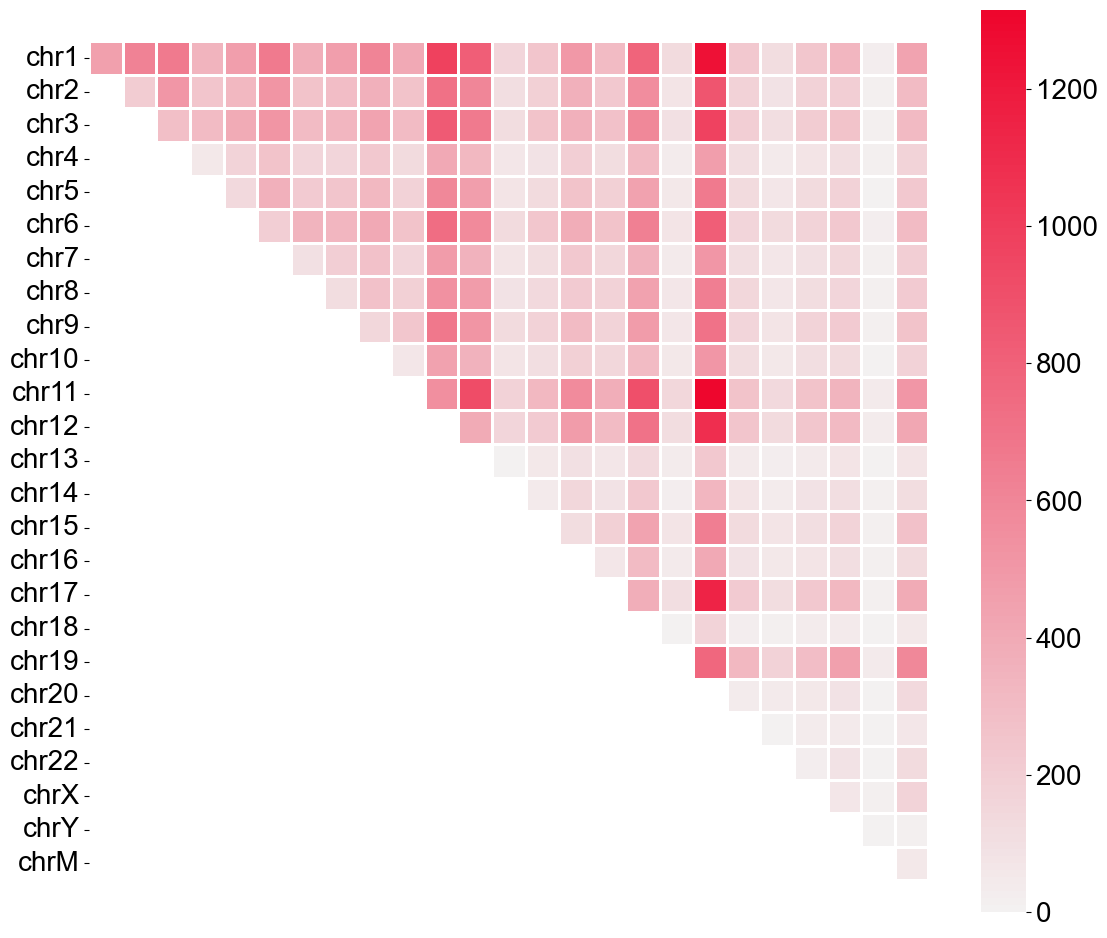

In [68]:
heatmap2(matrix_data, file_name="heatmap_chrom_connection.pdf")

<Axes: >

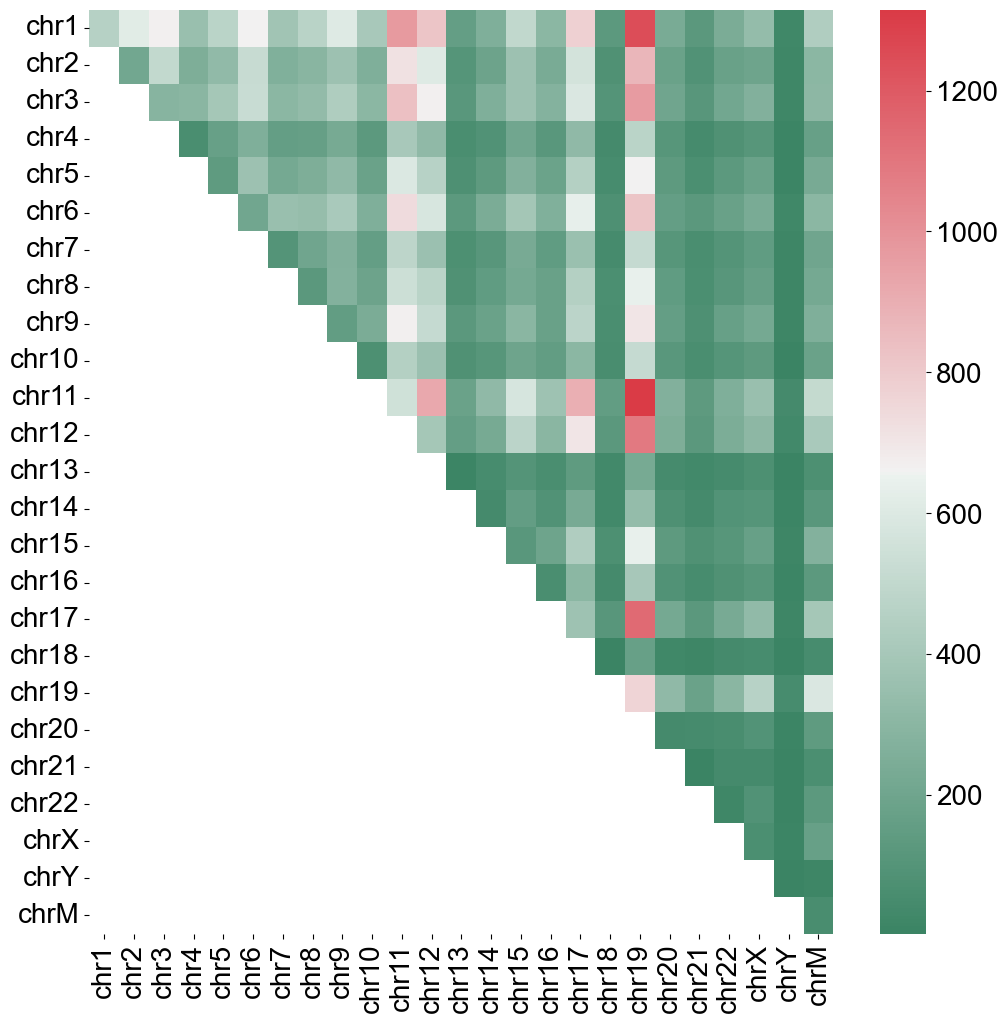

In [79]:
data = matrix_data.iloc[:25, :25]
fig, ax1 = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data)
mask[np.tril_indices_from(mask, k=-1)] = True
sns.heatmap(data, mask=mask, cmap=sns.diverging_palette(150, 10, as_cmap=True))

In [80]:
data

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr16,chr17,chr18,chr19,chr20,chr21,chr22,chrX,chrY,chrM
chr1,458.0,617.0,666.0,349.0,470.0,664.0,379.0,465.0,607.0,405.0,...,304.0,781.0,130.0,1245.0,235.0,122.0,241.0,335.0,28.0,434.0
chr2,0.0,212.0,505.0,252.0,325.0,517.0,264.0,293.0,364.0,258.0,...,235.0,562.0,81.0,872.0,182.0,86.0,176.0,197.0,20.0,303.0
chr3,0.0,0.0,287.0,300.0,394.0,521.0,304.0,330.0,432.0,303.0,...,275.0,590.0,99.0,967.0,198.0,113.0,212.0,267.0,19.0,310.0
chr4,0.0,0.0,0.0,60.0,172.0,258.0,158.0,162.0,227.0,128.0,...,116.0,316.0,40.0,472.0,110.0,44.0,82.0,107.0,12.0,172.0
chr5,0.0,0.0,0.0,0.0,141.0,364.0,220.0,251.0,320.0,179.0,...,187.0,452.0,52.0,659.0,133.0,69.0,128.0,179.0,10.0,232.0
chr6,0.0,0.0,0.0,0.0,0.0,205.0,348.0,337.0,410.0,258.0,...,262.0,634.0,77.0,819.0,160.0,124.0,173.0,236.0,24.0,302.0
chr7,0.0,0.0,0.0,0.0,0.0,0.0,97.0,201.0,268.0,157.0,...,145.0,355.0,47.0,513.0,106.0,63.0,96.0,145.0,16.0,202.0
chr8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,273.0,190.0,...,176.0,450.0,69.0,641.0,146.0,67.0,115.0,162.0,14.0,222.0
chr9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,241.0,...,173.0,477.0,63.0,703.0,158.0,76.0,169.0,221.0,17.0,258.0
chr10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,...,149.0,301.0,55.0,512.0,119.0,60.0,105.0,132.0,8.0,182.0


In [81]:
total_chrom_connection_per_chrom = data.sum(axis=1) + data.sum(axis=0) - np.diag(data)

In [82]:
total_chrom_connection_per_chrom

chr1     11649.0
chr2      8301.0
chr3      9332.0
chr4      4619.0
chr5      6470.0
chr6      8767.0
chr7      5342.0
chr8      6144.0
chr9      7394.0
chr10     5003.0
chr11    13242.0
chr12    10916.0
chr13     2251.0
chr14     3622.0
chr15     6571.0
chr16     4317.0
chr17    10563.0
chr18     1640.0
chr19    15384.0
chr20     3356.0
chr21     1810.0
chr22     3246.0
chrX      4397.0
chrY       408.0
chrM      5732.0
dtype: float64

In [83]:
raw_chrom_length = """
chr1	248956422
chr2	242193529
chr3	198295559
chr4	190214555
chr5	181538259
chr6	170805979
chr7	159345973
chrX	156040895
chr8	145138636
chr9	138394717
chr11	135086622
chr10	133797422
chr12	133275309
chr13	114364328
chr14	107043718
chr15	101991189
chr16	90338345
chr17	83257441
chr18	80373285
chr20	64444167
chr19	58617616
chrY	57227415
chr22	50818468
chr21	46709983
chrM	16569
"""
chrom_length = {line.split()[0]: int(line.split()[1]) for line in raw_chrom_length.strip().split("\n")}

In [84]:
total_chrom_connection_per_chrom_by_chrom_length = total_chrom_connection_per_chrom / pd.Series(chrom_length)

In [85]:
# # standardized_data = (data - np.mean(data)) / np.std(data)
# def min_max_scale(data, new_min=0, new_max=1):
#     return (data - data.min()) * (new_max - new_min) / (data.max() - data.min()) + new_min


In [86]:
total_chrom_connection_per_chrom_by_chrom_length

chr1     0.000047
chr10    0.000037
chr11    0.000098
chr12    0.000082
chr13    0.000020
chr14    0.000034
chr15    0.000064
chr16    0.000048
chr17    0.000127
chr18    0.000020
chr19    0.000262
chr2     0.000034
chr20    0.000052
chr21    0.000039
chr22    0.000064
chr3     0.000047
chr4     0.000024
chr5     0.000036
chr6     0.000051
chr7     0.000034
chr8     0.000042
chr9     0.000053
chrM     0.345947
chrX     0.000028
chrY     0.000007
dtype: float64

In [87]:
total_chrom_connection_per_chrom_by_chrom_length = total_chrom_connection_per_chrom_by_chrom_length.reindex(all_chrs[:-1])

In [88]:
total_chrom_connection_per_chrom_by_chrom_length

chr1     0.000047
chr2     0.000034
chr3     0.000047
chr4     0.000024
chr5     0.000036
chr6     0.000051
chr7     0.000034
chr8     0.000042
chr9     0.000053
chr10    0.000037
chr11    0.000098
chr12    0.000082
chr13    0.000020
chr14    0.000034
chr15    0.000064
chr16    0.000048
chr17    0.000127
chr18    0.000020
chr19    0.000262
chr20    0.000052
chr21    0.000039
chr22    0.000064
chrX     0.000028
chrY     0.000007
chrM     0.345947
dtype: float64

In [89]:
# min_max_scale(total_chrom_connection_per_chrom_by_chrom_length).plot(kind="bar")

In [90]:
total_chrom_connection_per_chrom_by_chrom_length_zscore = (total_chrom_connection_per_chrom_by_chrom_length - total_chrom_connection_per_chrom_by_chrom_length.mean()) / total_chrom_connection_per_chrom_by_chrom_length.std()

In [91]:
total_chrom_connection_per_chrom_by_chrom_length_zscore

chr1    -0.200138
chr2    -0.200318
chr3    -0.200134
chr4    -0.200463
chr5    -0.200299
chr6    -0.200072
chr7    -0.200329
chr8    -0.200202
chr9    -0.200042
chr10   -0.200273
chr11   -0.199397
chr12   -0.199630
chr13   -0.200529
chr14   -0.200325
chr15   -0.199883
chr16   -0.200123
chr17   -0.198980
chr18   -0.200519
chr19   -0.197020
chr20   -0.200061
chr21   -0.200254
chr22   -0.199891
chrX    -0.200407
chrY    -0.200711
chrM     4.799999
dtype: float64

<Axes: >

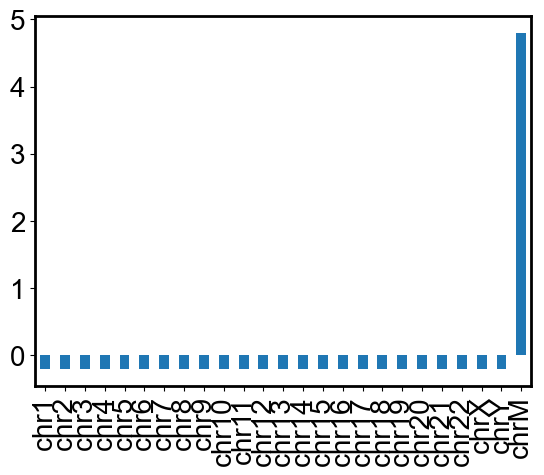

In [47]:
total_chrom_connection_per_chrom_by_chrom_length_zscore.plot(kind="bar")

In [98]:
def sig_analysis(data, file_name=None):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import stats
    
    # Z-score normalization
    z_scores = (data - data.mean()) / data.std()
    
    # Sort the z-scores
    z_scores_sorted = z_scores
    
    # Calculate p-values
    p_values = pd.Series({chr: stats.norm.sf(abs(z)) * 2 for chr, z in z_scores.items()})
    
    # Bonferroni correction for multiple testing
    alpha = 0.05
    bonferroni_threshold = alpha / len(p_values)
    
    # Plot
    plt.figure(figsize=(15, 6))
    bars = plt.bar(z_scores_sorted.index, z_scores_sorted.values)
    
    # Color bars based on significance
    for i, (chr, p_value) in enumerate(p_values[z_scores_sorted.index].items()):
        if p_value < bonferroni_threshold:
            bars[i].set_color(g2)
        elif p_value < alpha:
            bars[i].set_color('orange')
        else:
            bars[i].set_color(g1)
    
    plt.axhline(y=0, color='k', linestyle='--')
    # plt.title('Z-scores of Chromosome Data with Statistical Significance')
    
    # plt.xlabel('Chromosome')
    plt.ylabel('Z-score')
    plt.xticks(range(len(z_scores_sorted)), [f"C{i[1:3]} {i[3:]}" for i  in all_chrs[:-1]] ,rotation=90)
    
    # Add text annotation for chrM
    chrM_index = list(z_scores_sorted.index).index('chrM')
    plt.annotate(f'chrM\np-value: {p_values["chrM"]:.2e}', 
                 xy=(chrM_index, z_scores_sorted['chrM']),
                 xytext=(chrM_index-5, z_scores_sorted['chrM']+1),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    # sns.despine(trim=False, left=False)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )
    
    # Print statistical summary
    print("\nStatistical Summary:")
    print(f"chrM Z-score: {z_scores['chrM']:.2f}")
    print(f"chrM p-value: {p_values['chrM']:.2e}")
    print(f"Bonferroni-corrected significance threshold: {bonferroni_threshold:.2e}")


Statistical Summary:
chrM Z-score: 4.80
chrM p-value: 1.59e-06
Bonferroni-corrected significance threshold: 2.00e-03


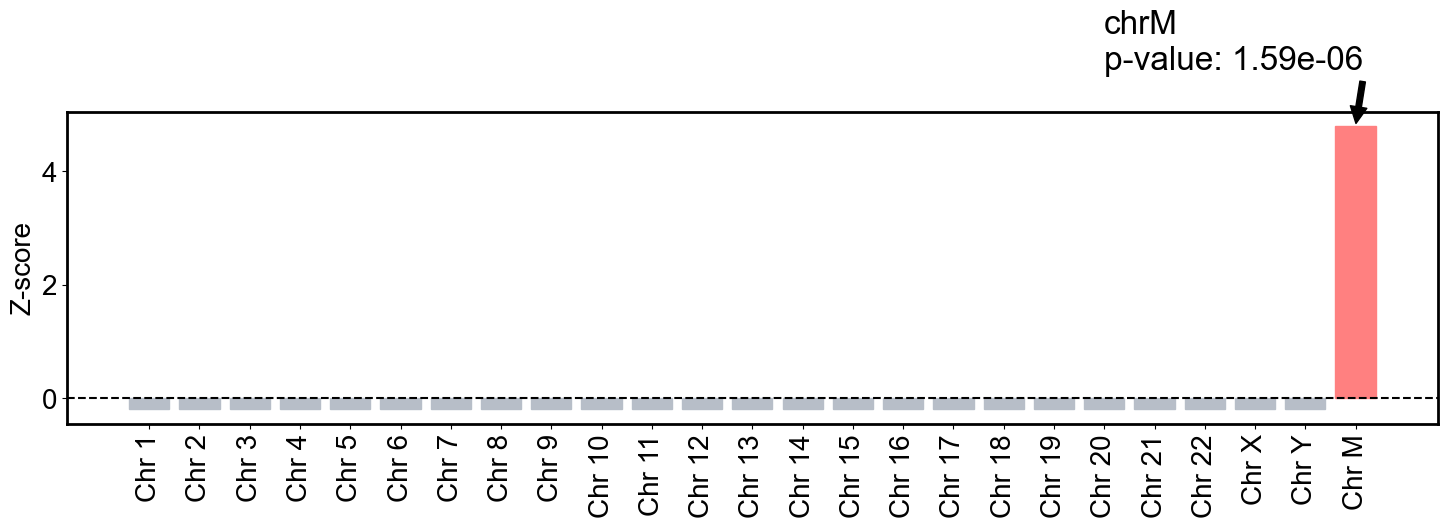

In [99]:
sig_analysis(total_chrom_connection_per_chrom_by_chrom_length, file_name="total_chrom_connection_per_chrom_by_chrom_length.pdf")

In [64]:
# all_chrs_labels = [f"Chr {i}" for i in range(1, 23)]  + ["Chr M", "Chr X", "Chr Y"]
all_chrs_labels = [f"{i}" for i in range(1, 23)]  + ["M", "X", "Y"]

In [150]:
colors = [ 
"#227980",
"#688F69",
"#D2DC38",
"#F5B16E",
"#F38F3C",
"#CE9FCA",

"#FAE93B",
"#415C42",
"#F7D1E3",
"#734E9C",
"#A9CCDE",
"#707070",

"#8BB8D6",
"#F7BF6C",
"#C0845C",
"#61B673", 
"#F37F76",
"#C3b0D2",

"#D4242A",
"#EE9094",
"#BCD896",
"#C6C2DF",
"#0C0C0C",
"#90D0C2",

"#FFCFD1"
]

all_chrs_colors = {l: colors[ind] for ind, l in enumerate(all_chrs_labels)}

In [151]:
all_chrs_colors

{'1': '#227980',
 '2': '#688F69',
 '3': '#D2DC38',
 '4': '#F5B16E',
 '5': '#F38F3C',
 '6': '#CE9FCA',
 '7': '#FAE93B',
 '8': '#415C42',
 '9': '#F7D1E3',
 '10': '#734E9C',
 '11': '#A9CCDE',
 '12': '#707070',
 '13': '#8BB8D6',
 '14': '#F7BF6C',
 '15': '#C0845C',
 '16': '#61B673',
 '17': '#F37F76',
 '18': '#C3b0D2',
 '19': '#D4242A',
 '20': '#EE9094',
 '21': '#BCD896',
 '22': '#C6C2DF',
 'M': '#0C0C0C',
 'X': '#90D0C2',
 'Y': '#FFCFD1'}

In [152]:
len(colors)

25

In [153]:
# all_chrs_labels
selected_matrix = matrix_data.iloc[:25, :25]
selected_matrix.index = all_chrs_labels 
selected_matrix.columns = all_chrs_labels

In [ ]:
from pycirclize import Circos

# Initialize from matrix (Can also directly load tsv matrix file)
circos = Circos.initialize_from_matrix(
selected_matrix,
    space=1,
    r_lim=(93, 100),
    cmap=all_chrs_colors,
    label_kws=dict(size=16),
    link_kws=dict(ec="black", lw=0, direction=0, alpha=1, color="white"),
)

fig = circos.plotfig(dpi=300, 
# figsize=(10, 10)
)
plt.tight_layout()
fig.savefig("vcap002_sa_tag_summary_connection_chr.pdf", dpi=300)

# Supplemental Figures

## Relative Chop Position

In [34]:
import deepchopper

In [35]:
stats_json_path = "./data/stats_pd1000000_bt0_hy.json"
stats = deepchopper.StatResult.from_json(stats_json_path)

Text(0.5, 0, 'Relative Position')

Text(0, 0.5, 'Density (log scale)')

([<matplotlib.axis.XTick at 0x350e72650>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

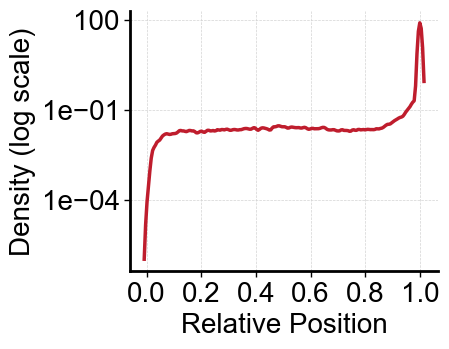

In [37]:
from matplotlib.ticker import LogFormatter

fig, ax = plt.subplots(figsize=(5, 4))
# fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot
kde = sns.kdeplot(stats.smooth_intervals_relative_pos, color=d1, linewidth=2.5)

# Set the y-axis to log scale
ax.set_yscale('log')
ax.yaxis.set_major_formatter(LogFormatter())

# Set the x-axis ticks
ax.set_xticks(np.arange(0, 1.1, 0.1))

# Set labels and title
ax.set_xlabel('Relative Position')
ax.set_ylabel('Density (log scale)')

# # Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Set the tick parameters
ax.tick_params(axis='both', which='both', length=4, width=1, direction='out')

# Set the grid
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)

plt.xticks(np.linspace(0, 1, 6))

# Adjust the plot layout
plt.tight_layout()

# Save the figure
plt.savefig("relative_chop_pos.pdf", dpi=300)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

## Chopped Read Length Distribution

In [29]:
vcap_002_all_adapter_length = json.load(open("data/vcap_002_all_pd_length_distri.json"))

In [30]:
len(vcap_002_all_adapter_length)

8218172

In [40]:
max(vcap_002_all_adapter_length)

264

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Density'>

Text(0.5, 0, 'Length of Predicted Artifacts')

Text(0, 0.5, 'Frequency')

([<matplotlib.axis.XTick at 0x3997804c0>,
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250')])

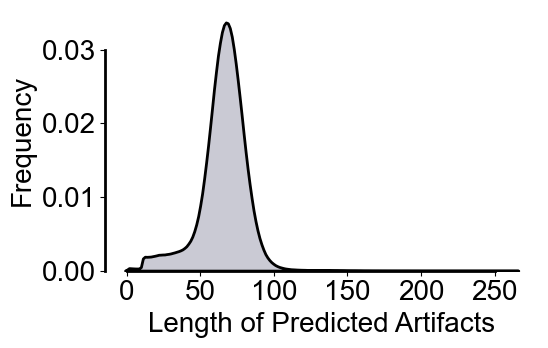

In [39]:
plt.figure(figsize=(6, 4))
sns.kdeplot(vcap_002_all_adapter_length, fill=True, color=e1, edgecolor="k", linewidth=2)

# plt.xticks(range(0, max_x, 1))
plt.xlabel("Length of Predicted Artifacts")
plt.ylabel("Frequency")

plt.xticks(np.linspace(0, 250, 6))
sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig("length_of_predicted_artifacts_vcap_002_all_predicts.pdf", dpi=300)

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Density'>

Text(0.5, 0, 'Length of Predicted Artifacts')

Text(0, 0.5, 'Frequency')

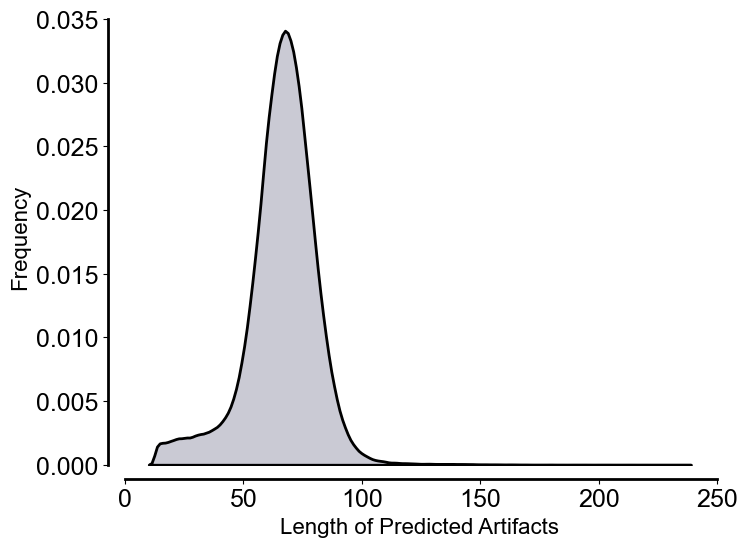

In [14]:
plt.figure(figsize=(8,6))
sns.kdeplot(stats.lenghth_smooth_predicts_with_chop(), fill=True, color=e1, edgecolor="k", linewidth=2)

# plt.xticks(range(0, max_x, 1))
plt.xlabel("Length of Predicted Artifacts")
plt.ylabel("Frequency")

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("length_of_predicted_artifacts.pdf", dpi=300)

## Chopped Read Count for Read Distribution

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'The Number of Intervals Per Predict')

Text(0, 0.5, 'Count (Log Scale)')

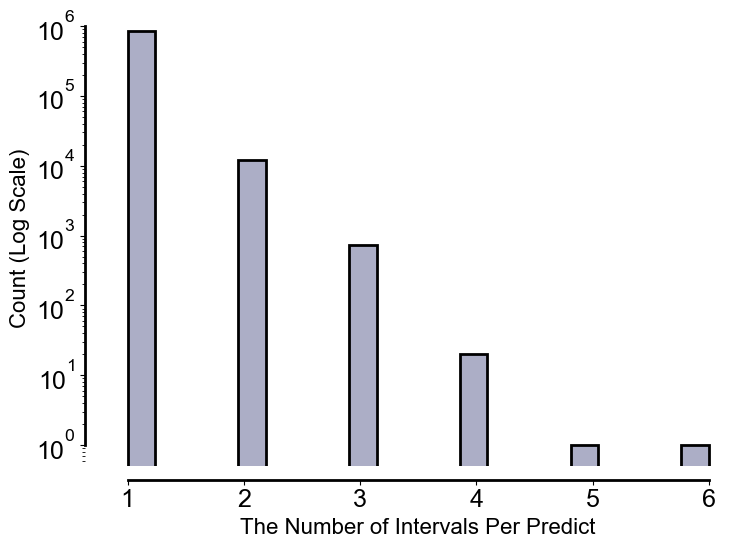

In [15]:
plt.figure(figsize=(8,6))

sns.histplot(stats.number_smooth_predicts_with_chop(), kde=False, color=e2, edgecolor="k", linewidth=2)
# sns.kdeplot(stats.number_smooth_predicts_with_chop(), fill=True, color=e1, edgecolor="k", linewidth=2)

plt.yscale('log')
# plt.xticks(range(0, max_x, 1))

plt.xlabel("The Number of Intervals Per Predict")
plt.ylabel("Count (Log Scale)")

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("count_of_predicted_artifacts_per_read.pdf", dpi=300)

## Terminal Adapter Base Quality and Blat Results

In [12]:
847421 / 1000000

0.847421

In [116]:
terminal_adapter_seq_qual = plot_qual("data/vcap_002_hyena_bt0_terminal_adapter.1000000pd.1013638record.chop.fq.gz")

In [117]:
len(terminal_adapter_seq_qual)

847421

<Axes: ylabel='Density'>

Text(0.5, 0, 'Base Qual')

Text(0, 0.5, 'Density')

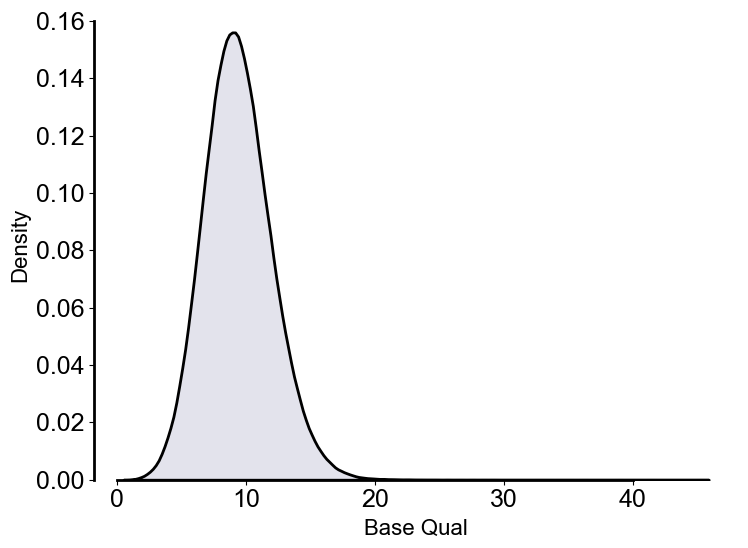

In [152]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharey=False)
sns.kdeplot(data=terminal_adapter_seq_qual, fill=True, color=e2, edgecolor="k", linewidth=2)

# left_bar = mpatches.Patch(color=e2, label="Removed Sequence")
# right_bar = mpatches.Patch(color=e3, label="Retained Sequence")
# axs[1].legend(handles=[left_bar, right_bar], loc="best")

sns.despine(offset=0, trim=True)

axs.set_xlabel("Base Qual")
plt.ylabel("Density")

plt.tight_layout()

plt.savefig(
    "base_quals_for_terminal_adapter_vcap_bt0.pdf",
    bbox_inches="tight",
    dpi=300,
)

In [10]:
terminal_adapter_blat = json.load(open("data/terminal_adapter_blat.json"))

In [11]:
len(terminal_adapter_blat)

630474

<Axes: ylabel='Density'>

Text(0.5, 0, 'BLAT Indentity')

Text(0, 0.5, 'Density')

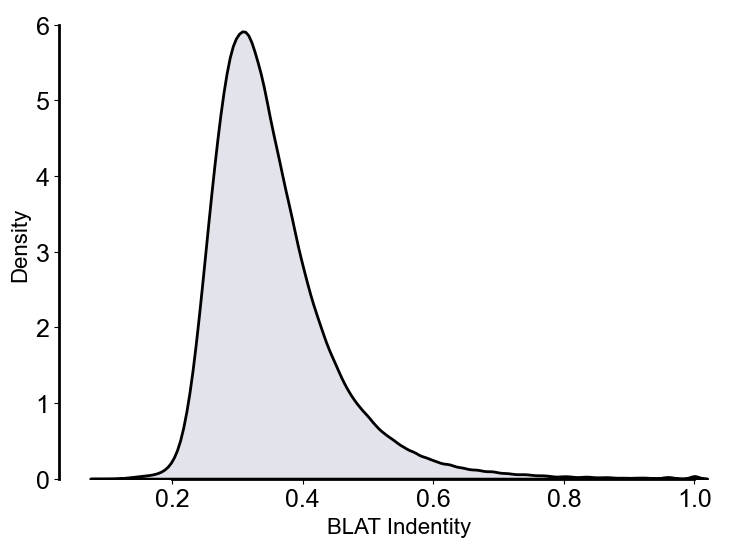

In [154]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharey=False)
sns.kdeplot(data=terminal_adapter_blat, fill=True, color=e2, edgecolor="k", linewidth=2)

# left_bar = mpatches.Patch(color=e2, label="Removed Sequence")
# right_bar = mpatches.Patch(color=e3, label="Retained Sequence")
# axs[1].legend(handles=[left_bar, right_bar], loc="best")

sns.despine(offset=0, trim=True)
axs.set_xlabel("BLAT Indentity")
plt.ylabel("Density")

plt.tight_layout()

plt.savefig(
    "blat_indentity_for_terminal_adapter_vcap_bt0.pdf",
    bbox_inches="tight",
    dpi=300,
)

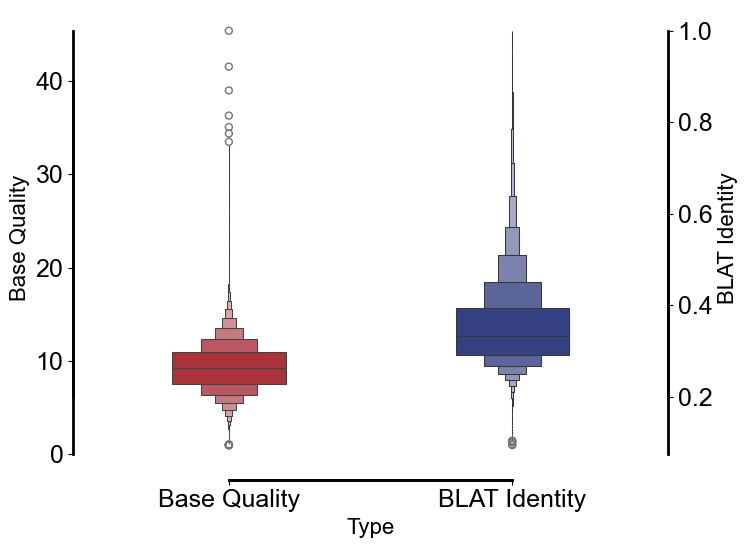

In [119]:
plot_box_for_base_qual_and_blat(terminal_adapter_seq_qual, terminal_adapter_blat, plot_type="boxenplot",figname="vcap002_terminal_base_qual_and_blat_box_plot.pdf")

## Terminal Adapter Chop Compared with SoftClipping of Bam

In [2]:
pie_data = {
"SC": 603299,
"NOSC" : 2144,
"NoBLAT": 2075,
}

[Text(0, 0, '3%')]

[Text(0, 0, '97%')]

(-0.11000000000000001, 0.11000000000000001, 0.0, 1.05)

(-0.5, 0.5)

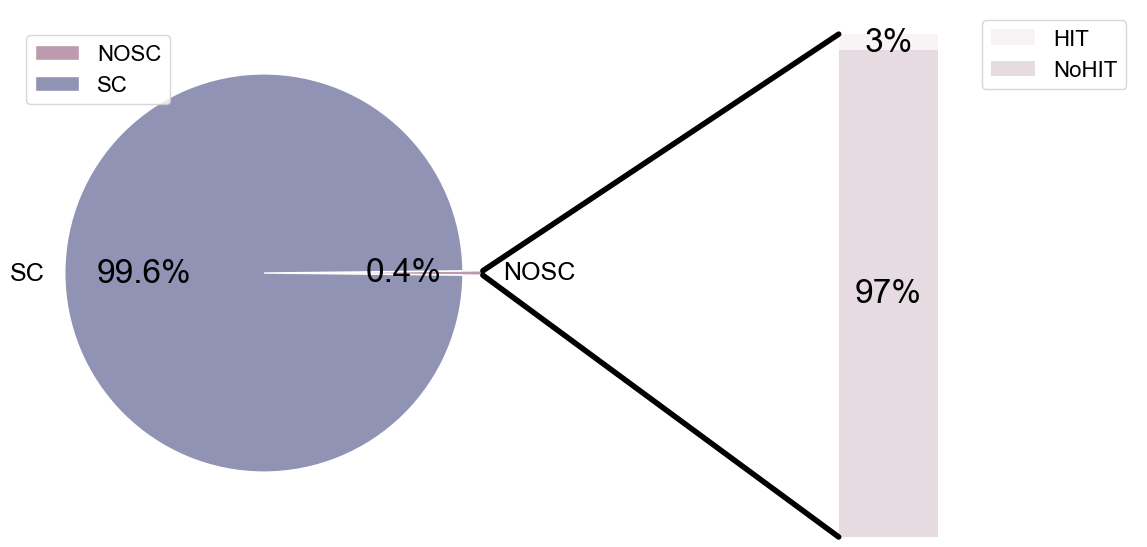

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [pie_data['NOSC']/sum(pie_data.values()),  pie_data['SC'] /sum(pie_data.values()) ]
labels = ['NOSC', 'SC']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, 
                     colors=[e3, e2],
                     wedgeprops={"linewidth": 1, "edgecolor": "white"}
                     )

# bar chart parameters
age_ratios = [pie_data['NoBLAT']/ pie_data['NOSC'], (pie_data['NOSC'] - pie_data['NoBLAT'])/ pie_data['NOSC']]
age_labels = ['NoHIT', 'HIT']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=e3, label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

# add a lengend for the pie chart
ax1.legend(wedges, labels,
        #    title="Chimeric Artifacts",
           loc="upper left")

plt.tight_layout()
plt.savefig("pie_bar_chart.pdf", dpi=300)